In [1]:
from collections import Counter
from math import sqrt
from random import Random
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
import string
import re
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse import csc_matrix
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import svds
#from scipy.stats.stats import spearmanr
from scipy.stats import spearmanr
from random import shuffle
import math
import random
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
#from sparsesvd import sparsesvd
from numpy.linalg import matrix_rank
from scipy.stats import chi2_contingency
from matplotlib.pyplot import *
from numpy import inf
from scipy.linalg import svd
from foobar import *

In [2]:
#load basic matrix and elements that are neeeded for later

text8_cooccur_dense = np.load("D:\\carme\\text8\\decomposed matrix\\cooccur_dense.npy")
text8_vocab = np.load("D:\\carme\\text8\\decomposed matrix\\vocab.npy", allow_pickle=True)
text8_vocab = dict(enumerate(text8_vocab.flatten(), 1))[1]
bnc_cooccur_dense = np.load("D:\\carme\\bnc\\decomposed matrix\\bnc_cooccur_dense.npy")
bnc_vocab = np.load("D:\\carme\\bnc\\decomposed matrix\\bnc_vocab.npy", allow_pickle=True)
bnc_vocab = dict(enumerate(bnc_vocab.flatten(), 1))[1]

test_files = ['wordsim353.txt', 'men_dataset.txt', 'mturk.txt', 'rarewords.txt', 'simlex999.txt']

dim_range1 = [2, 50]
dim_range2 = list(np.arange(100, 1001, 100))
dim_range3 = list(np.arange(2000, 10001, 1000))
dim_range = [*dim_range1, *dim_range2, *dim_range3]
eig_weight = [0, 0.5, 1, 1.2]
eig_weight_str = ['0', '0.5', '1', '1.2']
eig_weight_str_name = ['0', '0dot5', '1', '1dot2']
text8_rank = 11815
bnc_rank = 11332

In [12]:
#This is to calculate rho to create Table 2 in the paper

table3 = ["ttest", "pmi", "ppmi", "pmi_g", "root_ttest", "rootroot_ttest", "rootcca"]

n_met = len(table3)

index_list = np.tile(["&TTEST", "&PMI", "&PPMI", "&WPMI", "&ROOT-TTEST", "&ROOTROOT-TTEST", "&DEC-ROOTCCA"], 6)

dfone = pd.DataFrame()

df = pd.DataFrame()
for k in range(len(test_files)):
    for i in range(len(table3)): 
        test_type = test_files[k]
        text8namewsscoresi = np.load("D:\\carme\\text8\\table2\\text8_ws_score_"+table3[i]+".npy")
        text8temp = pd.DataFrame({
                             "rho":[text8namewsscoresi[k][2].astype(float)]})
        bncnamewsscoresi = np.load("D:\\carme\\bnc\\table2\\bnc_ws_score_"+table3[i]+".npy")
        bnctemp = pd.DataFrame({
                             "rho":[bncnamewsscoresi[k][2].astype(float)]})
        dfone["text8_rho"] = text8temp["rho"]
        dfone["bnc_rho"] = bnctemp["rho"]
        dfone["total"] = text8temp["rho"] + bnctemp["rho"]
        df = df.append(dfone, ignore_index=True)

for k in range(len(table3)): 

    dfone["text8_rho"] = df["text8_rho"][k]+df["text8_rho"][k+n_met]+df["text8_rho"][k+2*n_met]+df["text8_rho"][k+3*n_met]+df["text8_rho"][k+4*n_met]
    dfone["bnc_rho"] = df["bnc_rho"][k]+df["bnc_rho"][k+n_met]+df["bnc_rho"][k+2*n_met]+df["bnc_rho"][k+3*n_met]+df["bnc_rho"][k+4*n_met]
    dfone["total"] = dfone["text8_rho"] + dfone["bnc_rho"]
    df = df.append(dfone, ignore_index=True)
df.index = index_list

df["text8_rho"] = round(df["text8_rho"],3)
df["bnc_rho"] = round(df["bnc_rho"],3)
df["total"] = round(df["total"],3)

latex_table = df.to_latex()
print(latex_table)

\begin{tabular}{lrrr}
\toprule
{} &  text8\_rho &  bnc\_rho &  total \\
\midrule
\&TTEST          &      0.588 &    0.427 &  1.015 \\
\&PMI            &      0.587 &    0.292 &  0.879 \\
\&PPMI           &      0.609 &    0.505 &  1.115 \\
\&WPMI           &      0.233 &    0.221 &  0.454 \\
\&ROOT-TTEST     &      0.658 &    0.539 &  1.197 \\
\&ROOTROOT-TTEST &      0.646 &    0.495 &  1.141 \\
\&DEC-ROOTCCA    &      0.438 &    0.314 &  0.752 \\
\&TTEST          &      0.248 &    0.260 &  0.509 \\
\&PMI            &      0.269 &    0.224 &  0.494 \\
\&PPMI           &      0.253 &    0.284 &  0.537 \\
\&WPMI           &      0.132 &    0.171 &  0.303 \\
\&ROOT-TTEST     &      0.305 &    0.293 &  0.598 \\
\&ROOTROOT-TTEST &      0.317 &    0.263 &  0.580 \\
\&DEC-ROOTCCA    &      0.156 &    0.130 &  0.286 \\
\&TTEST          &      0.619 &    0.649 &  1.268 \\
\&PMI            &      0.629 &    0.514 &  1.143 \\
\&PPMI           &      0.651 &    0.625 &  1.276 \\
\&WPMI           &

C:\Users\qi000005\AppData\Local\Temp\ipykernel_7388\2227967050.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dfone, ignore_index=True)
C:\Users\qi000005\AppData\Local\Temp\ipykernel_7388\2227967050.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dfone, ignore_index=True)
C:\Users\qi000005\AppData\Local\Temp\ipykernel_7388\2227967050.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dfone, ignore_index=True)
C:\Users\qi000005\AppData\Local\Temp\ipykernel_7388\2227967050.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dfone, ignore_index=True)
C:\Users\qi00000

In [13]:
#This is to calculate the improvement CA, PMI-SVD, and PPMI-SVD versus TTEST, PMI, PPMI, respectively


table3 = ["ttest", "pmi", "ppmi", "pmi_g", "root_ttest", "rootroot_ttest", "rootcca"]
n_met = len(table3)

index_list = np.tile(["TTEST", "PMI", "PPMI", "WPMI", "&ROOT-TTEST", "&ROOTROOT-TTEST", "&DEC-ROOTCCA"], 6)

dfone = pd.DataFrame()

df_nodimred_comp = pd.DataFrame()
for k in range(len(test_files)):
    for i in range(len(table3)): 
        test_type = test_files[k]
        text8namewsscoresi = np.load("D:\\carme\\text8\\table2\\text8_ws_score_"+table3[i]+".npy")
        text8temp = pd.DataFrame({
                             "rho":[text8namewsscoresi[k][2].astype(float)]})
        bncnamewsscoresi = np.load("D:\\carme\\bnc\\table2\\bnc_ws_score_"+table3[i]+".npy")
        bnctemp = pd.DataFrame({
                             "rho":[bncnamewsscoresi[k][2].astype(float)]})
        dfone["text8_rho"] = text8temp["rho"]
        dfone["bnc_rho"] = bnctemp["rho"]
        dfone["total"] = text8temp["rho"] + bnctemp["rho"]
        df_nodimred_comp = df_nodimred_comp.append(dfone, ignore_index=True)

for k in range(len(table3)): 

    dfone["text8_rho"] = df_nodimred_comp["text8_rho"][k]+df_nodimred_comp["text8_rho"][k+n_met]+df_nodimred_comp["text8_rho"][k+2*n_met]+df_nodimred_comp["text8_rho"][k+3*n_met]+df_nodimred_comp["text8_rho"][k+4*n_met]
    dfone["bnc_rho"] = df_nodimred_comp["bnc_rho"][k]+df_nodimred_comp["bnc_rho"][k+n_met]+df_nodimred_comp["bnc_rho"][k+2*n_met]+df_nodimred_comp["bnc_rho"][k+3*n_met]+df_nodimred_comp["bnc_rho"][k+4*n_met]
    dfone["total"] = dfone["text8_rho"] + dfone["bnc_rho"]
    df_nodimred_comp = df_nodimred_comp.append(dfone, ignore_index=True)
df_nodimred_comp.index = index_list

table3 = ["raw_ca", "pmi_svd", "ppmi_svd", "pmi_gsvd", "root_ca", "rootroot_ca", "rootcca_svd"]
n_met = len(table3)

dfone = pd.DataFrame()

df_svd_ca_comp = pd.DataFrame()
for k in range(len(test_files)):
    for i in range(len(table3)): 
        test_type = test_files[k]
        text8namewsscoresi = np.load("D:\\carme\\text8\\text8_"+table3[i]+"_ws_score_cos_all.npy")
        text8temp = pd.DataFrame({"p":[eig_weight[unravel_index(text8namewsscoresi[k][:-1, [0, 1]].argmax(), text8namewsscoresi[k][:-1, [0, 1]].shape)[1]]],
                             "kdim":[dim_range[unravel_index(text8namewsscoresi[k][:-1, [0, 1]].argmax(), text8namewsscoresi[k][:-1, [0, 1]].shape)[0]]],
                             "rho":[text8namewsscoresi[k][:-1, [0, 1]].max()]})
        bncnamewsscoresi = np.load("D:\\carme\\bnc\\bnc_"+table3[i]+"_ws_score_cos_all.npy")
        bnctemp = pd.DataFrame({"p":[eig_weight[unravel_index(bncnamewsscoresi[k][:-1, [0, 1]].argmax(), bncnamewsscoresi[k][:-1, [0, 1]].shape)[1]]],
                             "kdim":[dim_range[unravel_index(bncnamewsscoresi[k][:-1, [0, 1]].argmax(), bncnamewsscoresi[k][:-1, [0, 1]].shape)[0]]],
                             "rho":[bncnamewsscoresi[k][:-1, [0, 1]].max()]})
        dfone["text8_rho"] = text8temp["rho"]
        dfone["bnc_rho"] = bnctemp["rho"]
        dfone["total"] = text8temp["rho"] + bnctemp["rho"]
        df_svd_ca_comp = df_svd_ca_comp.append(dfone, ignore_index=True)
for k in range(len(table3)):        
    dfone["text8_rho"] = df_svd_ca_comp["text8_rho"][k]+df_svd_ca_comp["text8_rho"][k+n_met]+df_svd_ca_comp["text8_rho"][k+2*n_met]+df_svd_ca_comp["text8_rho"][k+3*n_met]+df_svd_ca_comp["text8_rho"][k+4*n_met]
    dfone["bnc_rho"] = df_svd_ca_comp["bnc_rho"][k]+df_svd_ca_comp["bnc_rho"][k+n_met]+df_svd_ca_comp["bnc_rho"][k+2*n_met]+df_svd_ca_comp["bnc_rho"][k+3*n_met]+df_svd_ca_comp["bnc_rho"][k+4*n_met]
    dfone["total"] = dfone["text8_rho"] + dfone["bnc_rho"]
    df_svd_ca_comp = df_svd_ca_comp.append(dfone, ignore_index=True)

df_svd_ca_comp.index = index_list
sub = df_svd_ca_comp.subtract(df_nodimred_comp)
print(sub)
#print(sub - sub.shift(1))

                 text8_rho   bnc_rho     total
TTEST             0.021072  0.071213  0.092286
PMI               0.096295  0.335983  0.432278
PPMI              0.084595  0.123017  0.207611
WPMI              0.315072  0.247436  0.562509
&ROOT-TTEST       0.029692  0.118014  0.147706
&ROOTROOT-TTEST   0.050850  0.140130  0.190980
&DEC-ROOTCCA      0.245516  0.313949  0.559465
TTEST             0.007972  0.039096  0.047067
PMI               0.058198  0.168992  0.227191
PPMI              0.083003  0.110204  0.193207
WPMI              0.135757  0.146845  0.282601
&ROOT-TTEST       0.020096  0.106376  0.126472
&ROOTROOT-TTEST   0.022914  0.132591  0.155505
&DEC-ROOTCCA      0.158243  0.261862  0.420105
TTEST            -0.026351 -0.060873 -0.087224
PMI               0.047842  0.146724  0.194566
PPMI              0.026628  0.058015  0.084643
WPMI              0.220025  0.166540  0.386565
&ROOT-TTEST      -0.004510  0.035719  0.031209
&ROOTROOT-TTEST   0.001090  0.057062  0.058152
&DEC-ROOTCCA 

C:\Users\qi000005\AppData\Local\Temp\ipykernel_7388\718780150.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_nodimred_comp = df_nodimred_comp.append(dfone, ignore_index=True)
C:\Users\qi000005\AppData\Local\Temp\ipykernel_7388\718780150.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_nodimred_comp = df_nodimred_comp.append(dfone, ignore_index=True)
C:\Users\qi000005\AppData\Local\Temp\ipykernel_7388\718780150.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_nodimred_comp = df_nodimred_comp.append(dfone, ignore_index=True)
C:\Users\qi000005\AppData\Local\Temp\ipykernel_7388\718780150.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

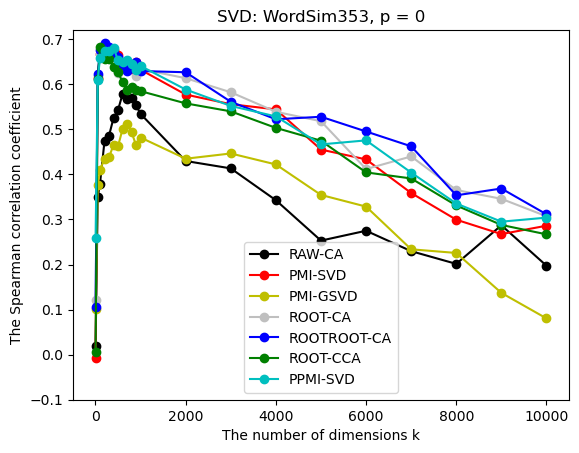

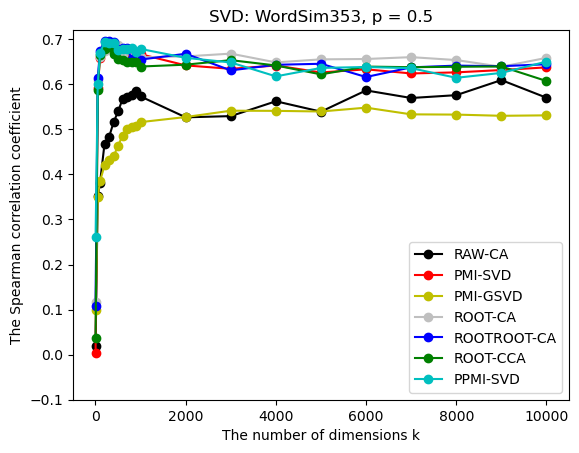

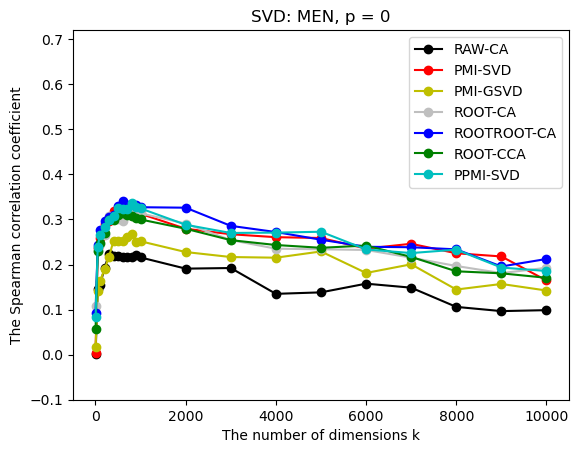

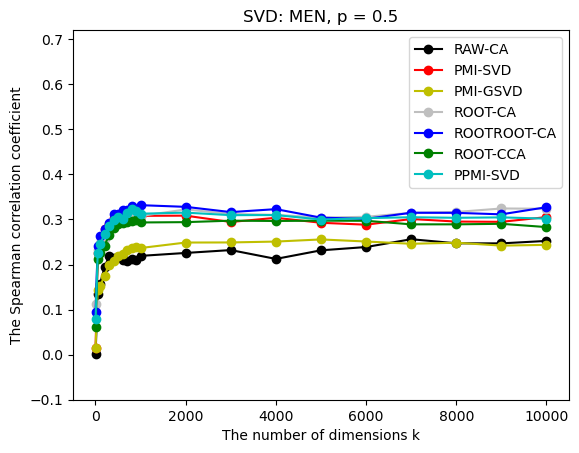

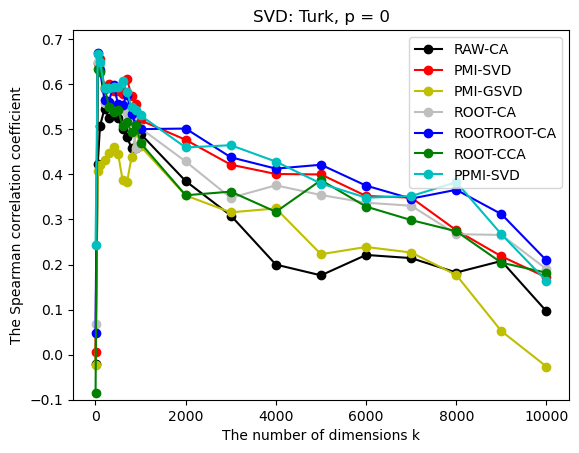

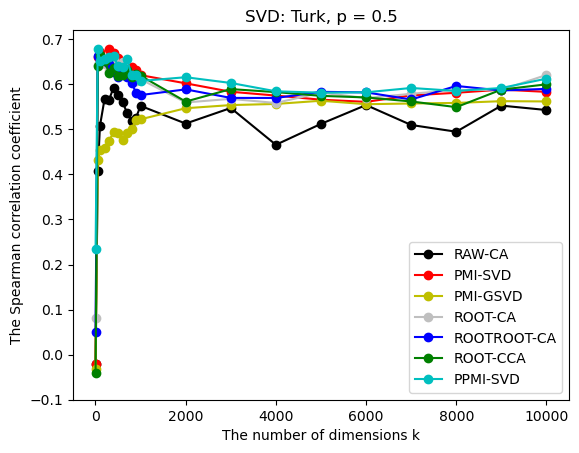

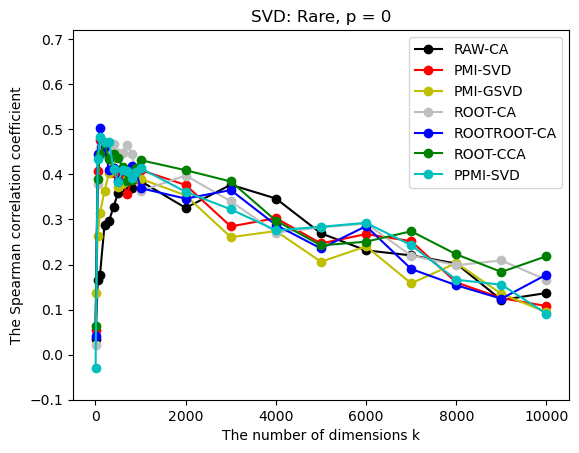

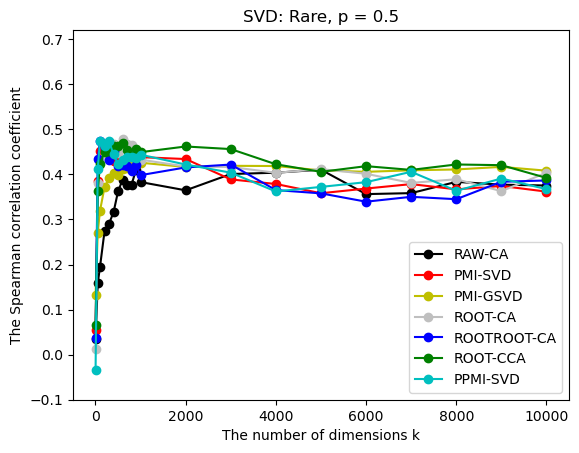

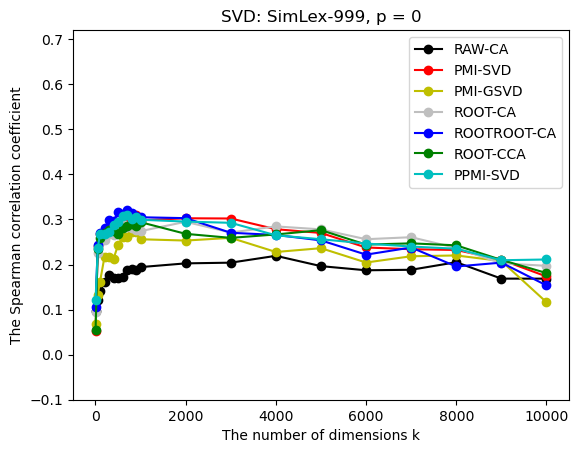

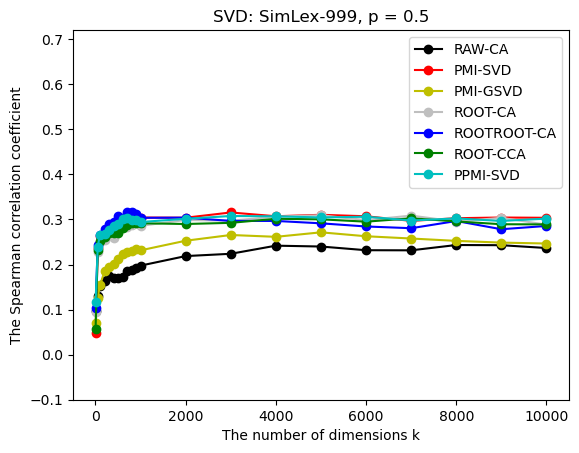

In [36]:
#This is to plot the figures: p = 0, 0.5. This is used in the paper for Figure B.1.
eig_weight_005 = [0, 0.5]
eig_weight_str_005 = ['0', '0.5']
eig_weight_str_name_005 = ['0', '0dot5']
folder = "D:\\carme\\text8"
col = ["ko-", "ro-", "yo-", "0.75", "bo-", "go-", "co-", "mo-", "wo-"]
test_files_name = ['WordSim353', 'MEN', 'Turk', 'Rare', 'SimLex-999']
table3 = ["raw_ca","pmi_svd", "pmi_gsvd", "root_ca", "rootroot_ca", "rootcca_svd", "ppmi_svd"]
index_list = np.tile(["RAW-CA", "PMI-SVD", "PMI-GSVD", "ROOT-CA", "ROOTROOT-CA", "ROOT-CCA", "PPMI-SVD", "GloVe", "SGNS"], 6)
for ntest in range(len(test_files_name)):
    for neigwei in range(len(eig_weight_005)):
            for i in range(len(table3)):
                text8namewsscoresi = np.load("D:\\carme\\text8\\text8_"+table3[i]+"_ws_score_cos_all.npy")
                if col[i] == "0.75": 
                    plt.plot(dim_range, text8namewsscoresi[ntest][:-1, neigwei], color="0.75", marker="o", linestyle="-", label = index_list[i])
                else:
                    plt.plot(dim_range, text8namewsscoresi[ntest][:-1, neigwei], col[i], label = index_list[i])
            plt.legend()
            plt.xlabel('The number of dimensions k')
            plt.ylabel('The Spearman correlation coefficient')
            plt.title("SVD: "+test_files_name[ntest]+", p = "+ eig_weight_str_005[neigwei])
            plt.ylim(-0.1, 0.72)
            plt.savefig(folder+"SVD"+test_files_name[ntest]+eig_weight_str_name_005[neigwei]+".png")
            plt.show()
            plt.close()

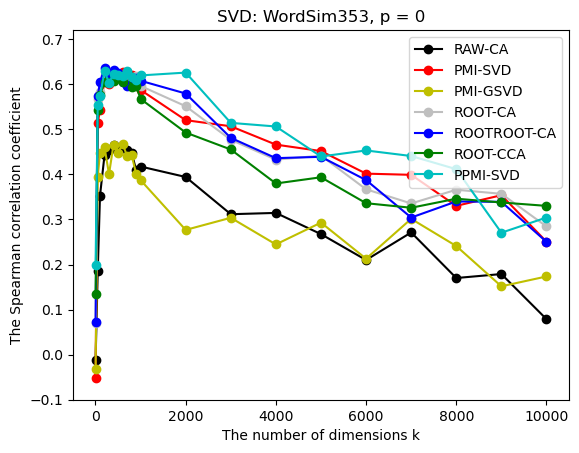

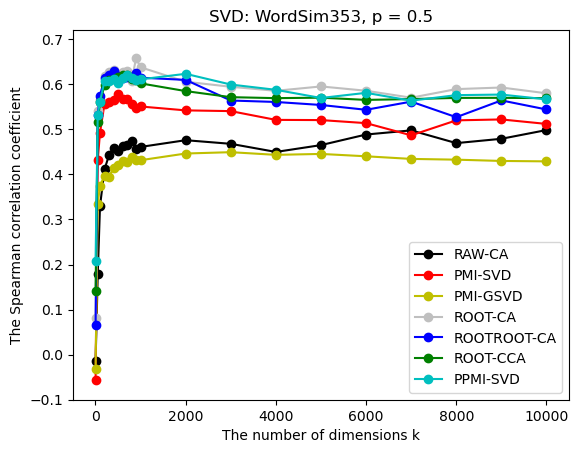

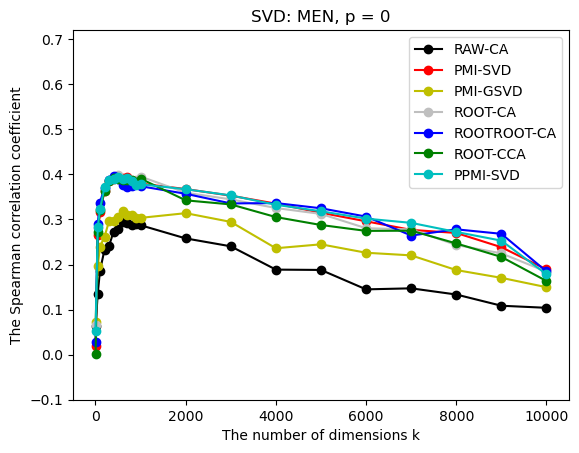

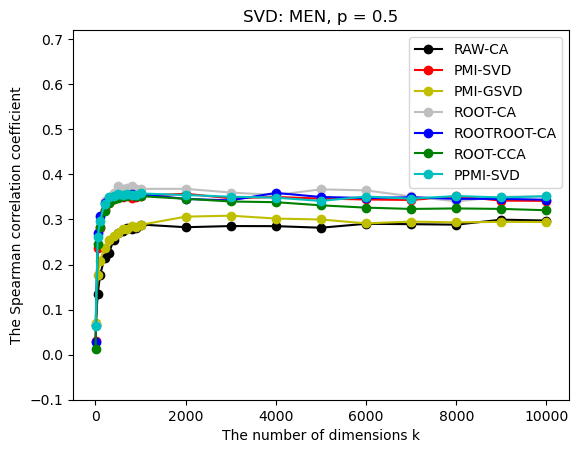

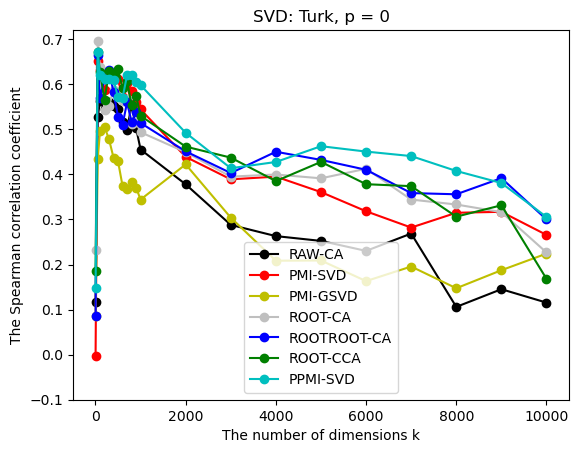

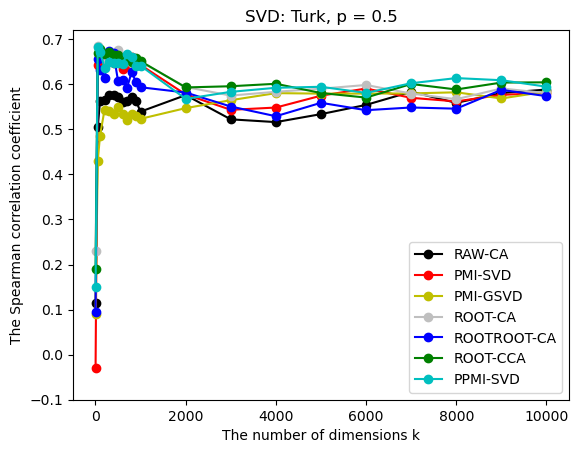

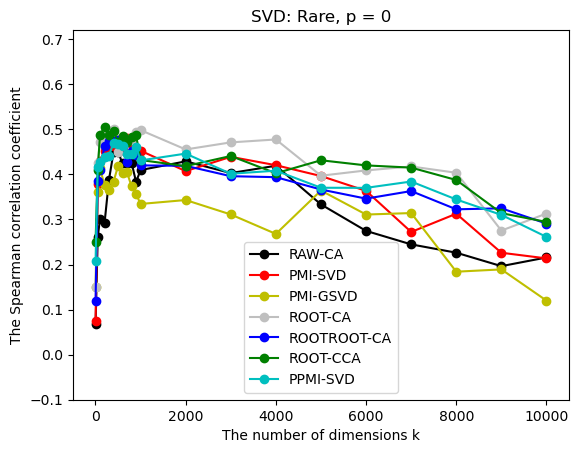

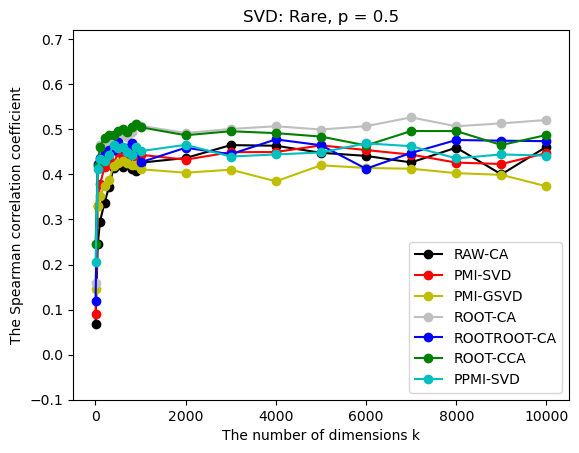

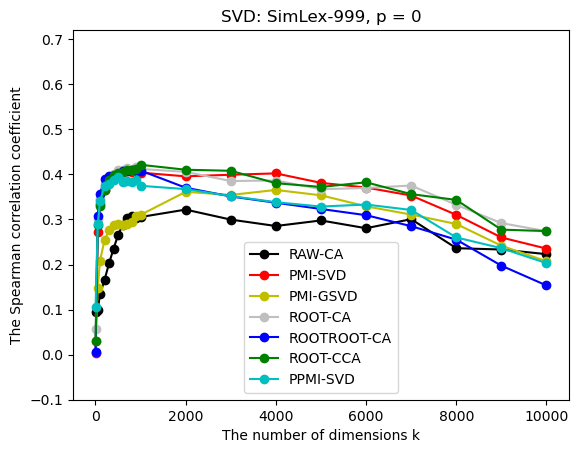

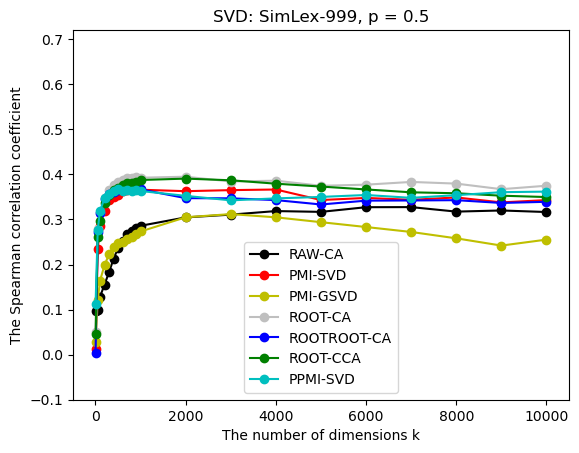

In [35]:
#This is to plot the figures: p = 0, 0.5.  This is used in the paper for Figure B.2.
eig_weight_005 = [0, 0.5]
eig_weight_str_005 = ['0', '0.5']
eig_weight_str_name_005 = ['0', '0dot5']
folder = "D:\\carme\\bnc"
col = ["ko-", "ro-", "yo-", "0.75","bo-", "go-", "co-", "mo-", "wo-"]
test_files_name = ['WordSim353', 'MEN', 'Turk', 'Rare', 'SimLex-999']
table3 = ["raw_ca", "pmi_svd", "pmi_gsvd", "root_ca", "rootroot_ca", "rootcca_svd", "ppmi_svd"]
index_list = np.tile(["RAW-CA", "PMI-SVD", "PMI-GSVD", "ROOT-CA", "ROOTROOT-CA", "ROOT-CCA", "PPMI-SVD", "GloVe", "SGNS"], 6)
ntest = 0
for ntest in range(len(test_files_name)):
    for neigwei in range(len(eig_weight_005)):
            for i in range(len(table3)):
                bncnamewsscoresi = np.load("D:\\carme\\bnc\\bnc_"+table3[i]+"_ws_score_cos_all.npy")
                if col[i] == "0.75": 
                    plt.plot(dim_range, bncnamewsscoresi[ntest][:-1, neigwei], color="0.75", marker="o", linestyle="-", label = index_list[i])
                else:
                    plt.plot(dim_range, bncnamewsscoresi[ntest][:-1, neigwei], col[i], label = index_list[i])
            plt.legend()
            plt.xlabel('The number of dimensions k')
            plt.ylabel('The Spearman correlation coefficient')
            plt.title("SVD: "+test_files_name[ntest]+", p = "+ eig_weight_str_005[neigwei])
            plt.ylim(-0.1, 0.72)
            plt.savefig(folder+"SVD"+test_files_name[ntest]+eig_weight_str_name_005[neigwei]+".png")
            plt.show()
            plt.close()

        


In [31]:
#This is used in the paper for Table 3.
#index_list = np.tile(["&GloVe"], 6)
dim_glove = [200, 300, 400, 500, 600]
dfone = pd.DataFrame()

df_glove = pd.DataFrame()
for k in range(len(test_files)):
    test_type = test_files[k]
    text8namewsscoresi = np.load("D:\\carme\\text8\\text8_ws_score_glove.npy")
    text8temp = pd.DataFrame({
                             "kdim":[dim_glove[unravel_index(text8namewsscoresi[k].argmax(), text8namewsscoresi[k].shape)[0]]],
                             "rho":[text8namewsscoresi[k].max()]})
    bncnamewsscoresi = np.load("D:\\carme\\bnc\\bnc_ws_score_glove.npy")
    bnctemp = pd.DataFrame({
                             "kdim":[dim_glove[unravel_index(bncnamewsscoresi[k].argmax(), bncnamewsscoresi[k].shape)[0]]],
                             "rho":[bncnamewsscoresi[k].max()]})
    dfone["text8_kdimp0"] = text8temp["kdim"]
    dfone["text8_rhop0"] = text8temp["rho"]
    
    dfone["bnc_kdimp0"] = bnctemp["kdim"]
    dfone["bnc_rhop0"] = bnctemp["rho"]
    
    dfone["totalp0"] = text8temp["rho"] + bnctemp["rho"]
    
    dfone["text8_kdimp1"] = text8temp["kdim"]
    dfone["text8_rhop1"] = text8temp["rho"]
    
    dfone["bnc_kdimp1"] = bnctemp["kdim"]
    dfone["bnc_rhop1"] = bnctemp["rho"]
    
    dfone["totalp1"] = text8temp["rho"] + bnctemp["rho"]
    
    df_glove = df_glove.append(dfone, ignore_index=True)
    
dfone["text8_kdimp0"] = ""
dfone["text8_rhop0"] = np.sum(df_glove["text8_rhop0"])
dfone["bnc_kdimp0"] = ""
dfone["bnc_rhop0"] = np.sum(df_glove["bnc_rhop0"])
dfone["totalp0"] = np.sum(df_glove["text8_rhop0"]) + np.sum(df_glove["bnc_rhop0"])

dfone["text8_kdimp1"] = ""
dfone["text8_rhop1"] = np.sum(df_glove["text8_rhop1"])
dfone["bnc_kdimp1"] = ""
dfone["bnc_rhop1"] = np.sum(df_glove["bnc_rhop1"])
dfone["totalp1"] = np.sum(df_glove["text8_rhop1"]) + np.sum(df_glove["bnc_rhop1"])
df_glove = df_glove.append(dfone, ignore_index=True)
#df_glove.index = index_list

#df_glove["text8_rho"] = round(df_glove["text8_rho"],3)
#df_glove["bnc_rho"] = round(df_glove["bnc_rho"],3)
#df_glove["total"] = round(df_glove["total"],3)
#latex_table = df_glove.to_latex()
#print(latex_table)


#index_list = np.tile(["&SGNS"], 6)
dim_sgns = [200, 300, 400, 500, 600]

dfone = pd.DataFrame()

df_sgns = pd.DataFrame()
for k in range(len(test_files)):
    test_type = test_files[k]
    text8namewsscoresi = np.load("D:\\carme\\text8\\text8_ws_score_sgns.npy")
    text8temp = pd.DataFrame({
                             "kdim":[dim_sgns[unravel_index(text8namewsscoresi[k].argmax(), text8namewsscoresi[k].shape)[0]]],
                             "rho":[text8namewsscoresi[k].max()]})
    bncnamewsscoresi = np.load("D:\\carme\\bnc\\bnc_ws_score_sgns.npy")
    bnctemp = pd.DataFrame({
                             "kdim":[dim_sgns[unravel_index(bncnamewsscoresi[k].argmax(), bncnamewsscoresi[k].shape)[0]]],
                             "rho":[bncnamewsscoresi[k].max()]})
    dfone["text8_kdimp0"] = text8temp["kdim"]
    dfone["text8_rhop0"] = text8temp["rho"]
    
    dfone["bnc_kdimp0"] = bnctemp["kdim"]
    dfone["bnc_rhop0"] = bnctemp["rho"]
    
    dfone["totalp0"] = text8temp["rho"] + bnctemp["rho"]
    
    dfone["text8_kdimp1"] = text8temp["kdim"]
    dfone["text8_rhop1"] = text8temp["rho"]
    
    dfone["bnc_kdimp1"] = bnctemp["kdim"]
    dfone["bnc_rhop1"] = bnctemp["rho"]
    
    dfone["totalp1"] = text8temp["rho"] + bnctemp["rho"]
    
    df_sgns = df_sgns.append(dfone, ignore_index=True)
    
dfone["text8_kdimp0"] = ""
dfone["text8_rhop0"] = np.sum(df_sgns["text8_rhop0"])
dfone["bnc_kdimp0"] = ""
dfone["bnc_rhop0"] = np.sum(df_sgns["bnc_rhop0"])
dfone["totalp0"] = np.sum(df_sgns["text8_rhop0"]) + np.sum(df_sgns["bnc_rhop0"])

dfone["text8_kdimp1"] = ""
dfone["text8_rhop1"] = np.sum(df_sgns["text8_rhop1"])
dfone["bnc_kdimp1"] = ""
dfone["bnc_rhop1"] = np.sum(df_sgns["bnc_rhop1"])
dfone["totalp1"] = np.sum(df_sgns["text8_rhop1"]) + np.sum(df_sgns["bnc_rhop1"])
df_sgns = df_sgns.append(dfone, ignore_index=True)
#df_sgns.index = index_list

#df_sgns["text8_rho"] = round(df_sgns["text8_rho"],3)
#df_sgns["bnc_rho"] = round(df_sgns["bnc_rho"],3)
#df_sgns["total"] = round(df_sgns["total"],3)
#latex_table = df_sgns.to_latex()
#print(latex_table)

table3 = ["raw_ca", "pmi_svd", "ppmi_svd", "pmi_gsvd", "root_ca", "rootroot_ca", "rootcca_svd"]
index_list = np.tile(["&RAW-CA", "&PMI-SVD", "&PPMI-SVD", "&PMI-GSVD", "&ROOT-CA", "&ROOTROOT-CA", "&ROOT-CCA", "&GloVe", "&SGNS"], 6)
n_met = len(table3) + 2
pindex = [0, 1]
dfone = pd.DataFrame()

df_svd_ca = pd.DataFrame()
for k in range(len(test_files)):
    for i in range(len(table3)): 
        test_type = test_files[k]
        text8namewsscoresi = np.load("D:\\carme\\text8\\text8_"+table3[i]+"_ws_score_cos_all.npy")
        bncnamewsscoresi = np.load("D:\\carme\\bnc\\bnc_"+table3[i]+"_ws_score_cos_all.npy")
        
        text8tempp0 = pd.DataFrame({
                             "kdim":[dim_range[text8namewsscoresi[k][:-1, pindex[0]].argmax()]],
                             "rho":[text8namewsscoresi[k][:-1, pindex[0]].max()]})
        bnctempp0 = pd.DataFrame({
                             "kdim":[dim_range[bncnamewsscoresi[k][:-1, pindex[0]].argmax()]],
                             "rho":[bncnamewsscoresi[k][:-1, pindex[0]].max()]})
        dfone["text8_kdimp0"] = text8tempp0["kdim"]
        dfone["text8_rhop0"] = text8tempp0["rho"]
        dfone["bnc_kdimp0"] = bnctempp0["kdim"]
        dfone["bnc_rhop0"] = bnctempp0["rho"]
        dfone["totalp0"] = text8tempp0["rho"] + bnctempp0["rho"]
        
        text8tempp1 = pd.DataFrame({
                             "kdim":[dim_range[text8namewsscoresi[k][:-1, pindex[1]].argmax()]],
                             "rho":[text8namewsscoresi[k][:-1, pindex[1]].max()]})
        bnctempp1 = pd.DataFrame({
                             "kdim":[dim_range[bncnamewsscoresi[k][:-1, pindex[1]].argmax()]],
                             "rho":[bncnamewsscoresi[k][:-1, pindex[1]].max()]})
        dfone["text8_kdimp1"] = text8tempp1["kdim"]
        dfone["text8_rhop1"] = text8tempp1["rho"]
        dfone["bnc_kdimp1"] = bnctempp1["kdim"]
        dfone["bnc_rhop1"] = bnctempp1["rho"]
        dfone["totalp1"] = text8tempp1["rho"] + bnctempp1["rho"]
        
        df_svd_ca = df_svd_ca.append(dfone, ignore_index=True)
        
    df_svd_ca = df_svd_ca.append(df_glove.iloc[k], ignore_index=True)
    df_svd_ca = df_svd_ca.append(df_sgns.iloc[k], ignore_index=True)
for k in range(len(table3)):        
    dfone["text8_kdimp0"] = ""
    dfone["text8_rhop0"] = df_svd_ca["text8_rhop0"][k]+df_svd_ca["text8_rhop0"][k+n_met]+df_svd_ca["text8_rhop0"][k+2*n_met]+df_svd_ca["text8_rhop0"][k+3*n_met]+df_svd_ca["text8_rhop0"][k+4*n_met]
    dfone["bnc_kdimp0"] = ""
    dfone["bnc_rhop0"] = df_svd_ca["bnc_rhop0"][k]+df_svd_ca["bnc_rhop0"][k+n_met]+df_svd_ca["bnc_rhop0"][k+2*n_met]+df_svd_ca["bnc_rhop0"][k+3*n_met]+df_svd_ca["bnc_rhop0"][k+4*n_met]
    dfone["totalp0"] = dfone["text8_rhop0"] + dfone["bnc_rhop0"]
    dfone["text8_kdimp1"] = ""
    dfone["text8_rhop1"] = df_svd_ca["text8_rhop1"][k]+df_svd_ca["text8_rhop1"][k+n_met]+df_svd_ca["text8_rhop1"][k+2*n_met]+df_svd_ca["text8_rhop1"][k+3*n_met]+df_svd_ca["text8_rhop1"][k+4*n_met]
    dfone["bnc_kdimp1"] = ""
    dfone["bnc_rhop1"] = df_svd_ca["bnc_rhop1"][k]+df_svd_ca["bnc_rhop1"][k+n_met]+df_svd_ca["bnc_rhop1"][k+2*n_met]+df_svd_ca["bnc_rhop1"][k+3*n_met]+df_svd_ca["bnc_rhop1"][k+4*n_met]
    dfone["totalp1"] = dfone["text8_rhop1"] + dfone["bnc_rhop1"]
    df_svd_ca = df_svd_ca.append(dfone, ignore_index=True)
df_svd_ca = df_svd_ca.append(df_glove.iloc[5], ignore_index=True)
df_svd_ca = df_svd_ca.append(df_sgns.iloc[5], ignore_index=True)

df_svd_ca.index = index_list

df_svd_ca["text8_rhop0"] = round(df_svd_ca["text8_rhop0"],3)
df_svd_ca["bnc_rhop0"] = round(df_svd_ca["bnc_rhop0"],3)
df_svd_ca["totalp0"] = round(df_svd_ca["totalp0"],3)
df_svd_ca["text8_rhop1"] = round(df_svd_ca["text8_rhop1"],3)
df_svd_ca["bnc_rhop1"] = round(df_svd_ca["bnc_rhop1"],3)
df_svd_ca["totalp1"] = round(df_svd_ca["totalp1"],3)

latex_table = df_svd_ca.to_latex()
print(latex_table)

\begin{tabular}{llrlrrlrlrr}
\toprule
{} & text8\_kdimp0 &  text8\_rhop0 & bnc\_kdimp0 &  bnc\_rhop0 &  totalp0 & text8\_kdimp1 &  text8\_rhop1 & bnc\_kdimp1 &  bnc\_rhop1 &  totalp1 \\
\midrule
\&RAW-CA      &          600 &        0.578 &        400 &      0.465 &    1.043 &         9000 &        0.609 &      10000 &      0.498 &    1.107 \\
\&PMI-SVD     &          400 &        0.675 &        600 &      0.628 &    1.303 &          400 &        0.683 &        500 &      0.579 &    1.262 \\
\&PPMI-SVD    &          400 &        0.681 &        700 &      0.628 &    1.309 &          200 &        0.694 &       2000 &      0.623 &    1.317 \\
\&PMI-GSVD    &          700 &        0.512 &        600 &      0.468 &    0.980 &         6000 &        0.548 &       3000 &      0.449 &    0.997 \\
\&ROOT-CA     &          300 &        0.668 &        400 &      0.623 &    1.291 &          500 &        0.688 &        900 &      0.657 &    1.345 \\
\&ROOTROOT-CA &          200 &        0.692 &     

C:\Users\qi000005\AppData\Local\Temp\ipykernel_8316\821444221.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_glove = df_glove.append(dfone, ignore_index=True)
C:\Users\qi000005\AppData\Local\Temp\ipykernel_8316\821444221.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_glove = df_glove.append(dfone, ignore_index=True)
C:\Users\qi000005\AppData\Local\Temp\ipykernel_8316\821444221.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_glove = df_glove.append(dfone, ignore_index=True)
C:\Users\qi000005\AppData\Local\Temp\ipykernel_8316\821444221.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_glove = df_glove.appen

In [70]:
#This is not used in the paper.
print(text8_cooccur_dense.var())
print(text8_cooccur_dense.mean())
text8_root = np.load("D:\\carme\\text8\\decomposed matrix\\text8_root.npy")
print(text8_root.var())
print(text8_root.mean())
text8_rootroot = np.load("D:\\carme\\text8\\decomposed matrix\\text8_rootroot.npy")
print(text8_rootroot.var())
print(text8_rootroot.mean())

3837.664133783973
0.33249442088309883
0.32592986967710913
0.08102191805918263
0.07687346105859733
0.06440851652216828


In [12]:
#This is not used in the paper.
print(bnc_cooccur_dense.var())
print(bnc_cooccur_dense.mean())
bnc_root = np.load("D:\\carme\\bnc\\decomposed matrix\\bnc_root.npy")
print(bnc_root.var())
print(bnc_root.mean())
bnc_rootroot = np.load("D:\\carme\\bnc\\decomposed matrix\\bnc_rootroot.npy")
print(bnc_rootroot.var())
print(bnc_rootroot.mean())

70474.9221745781
2.143467580351535
2.0686225728335974
0.2735781561417903
0.23793885979262755
0.18878372903711785


In [17]:
#This is not used in the paper: the proportion of 0 in raw matrix of Text8

text8_cooccur_unique, text8_cooccur_frequency = np.unique(text8_cooccur_dense,
                              return_counts = True)
text8_cooccur_indices = np.where(text8_cooccur_unique == 0)
text8_cooccur_unique_del0 = np.delete(text8_cooccur_unique, text8_cooccur_indices)
text8_cooccur_frequency_del0 = np.delete(text8_cooccur_frequency, text8_cooccur_indices)

text8_cooccur_frequency[text8_cooccur_indices]/np.sum(text8_cooccur_frequency)

array([0.94158122])

In [29]:
#This is not used in the paper: the proportion of 0 in raw matrix of BNC

bnc_cooccur_unique, bnc_cooccur_frequency = np.unique(bnc_cooccur_dense,
                              return_counts = True)
bnc_cooccur_indices = np.where(bnc_cooccur_unique == 0)
bnc_cooccur_unique_del0 = np.delete(bnc_cooccur_unique, bnc_cooccur_indices)
bnc_cooccur_frequency_del0 = np.delete(bnc_cooccur_frequency, bnc_cooccur_indices)

bnc_cooccur_frequency[bnc_cooccur_indices]/np.sum(bnc_cooccur_frequency)

array([0.84089613])

In [15]:
#This is used in the paper: the proportion of 0 in PMI matrix of Text8

text8_pmi = np.load("D:\\carme\\text8\\decomposed matrix\\text8_pmi.npy")
text8_pmi_unique, text8_pmi_frequency = np.unique(text8_pmi,
                              return_counts = True)
text8_pmi_indices = np.where(text8_pmi_unique == 0)
text8_pmi_unique_del0 = np.delete(text8_pmi_unique, text8_pmi_indices)
text8_pmi_frequency_del0 = np.delete(text8_pmi_frequency, text8_pmi_indices)
print(text8_pmi_frequency[text8_pmi_indices]/np.sum(text8_pmi_frequency))
print(np.sum(text8_pmi_frequency[np.where(text8_pmi_unique < 0)])/np.sum(text8_pmi_frequency))
print(np.sum(text8_pmi_frequency[np.where(text8_pmi_unique > 0)])/np.sum(text8_pmi_frequency))
#def check_symmetric(a, tol=1e-8):
#    return np.all(np.abs(a-a.T) < tol)
#print(check_symmetric(text8_pmi))

[0.94158122]
0.01311304962651571
0.04530572808438171


In [16]:
P = text8_cooccur_dense / np.sum(text8_cooccur_dense)
w = np.array(P.sum(axis = 1))
c = np.array(P.sum(axis=0)).T
D_w_recip = np.diag(np.reciprocal(w))
D_c_recip = np.diag(np.reciprocal(c))     
pmiwithoutlog = D_w_recip @ (P) @ D_c_recip -1
np.max(pmiwithoutlog)

45043.784879458864

In [3]:
#This is used in the paper: the proportion of 0 in PMI matrix of BNC

bnc_pmi = np.load("D:\\carme\\bnc\\decomposed matrix\\bnc_pmi.npy")
bnc_pmi_unique, bnc_pmi_frequency = np.unique(bnc_pmi,
                              return_counts = True)
bnc_pmi_indices = np.where(bnc_pmi_unique == 0)
bnc_pmi_unique_del0 = np.delete(bnc_pmi_unique, bnc_pmi_indices)
bnc_pmi_frequency_del0 = np.delete(bnc_pmi_frequency, bnc_pmi_indices)
print(bnc_pmi_frequency[bnc_pmi_indices]/np.sum(bnc_pmi_frequency))
print(np.sum(bnc_pmi_frequency[np.where(bnc_pmi_unique < 0)])/np.sum(bnc_pmi_frequency))
print(np.sum(bnc_pmi_frequency[np.where(bnc_pmi_unique > 0)])/np.sum(bnc_pmi_frequency))
#def check_symmetric(a, tol=1e-8):
#    return np.all(np.abs(a-a.T) < tol)
#print(check_symmetric(bnc_pmi))

[0.84089613]
0.059757001685420766
0.09934686830331195


In [17]:
P = bnc_cooccur_dense / np.sum(bnc_cooccur_dense)
w = np.array(P.sum(axis = 1))
c = np.array(P.sum(axis=0)).T
D_w_recip = np.diag(np.reciprocal(w))
D_c_recip = np.diag(np.reciprocal(c))     
pmiwithoutlog = D_w_recip @ (P) @ D_c_recip -1
np.max(pmiwithoutlog)

35554.8678799443

In [11]:
#load PMI, PPMI, WPMI 

text8_pmi = np.load("D:\\carme\\text8\\decomposed matrix\\text8_pmi.npy")
text8_ppmi = np.load("D:\\carme\\text8\\decomposed matrix\\text8_ppmi.npy")
text8_pmi_gsvd = np.load("D:\\carme\\text8\\decomposed matrix\\text8_pmi_gsvd.npy")


text8_pmi_fla = text8_pmi.flatten()
text8_ppmi_fla = text8_ppmi.flatten()
text8_pmi_gsvd_fla = text8_pmi_gsvd.flatten()


In [3]:
#load TTEST, ROOT-TTEST, ROOTROOT-TTEST, STRATOS-TTEST

text8_ttest = np.load("D:\\carme\\text8\\decomposed matrix\\text8_ttest.npy")
text8_root_ttest = np.load("D:\\carme\\text8\\decomposed matrix\\text8_root_ttest.npy")
text8_rootroot_ttest = np.load("D:\\carme\\text8\\decomposed matrix\\text8_rootroot_ttest.npy")
text8_rootcca = np.load("D:\\carme\\text8\\decomposed matrix\\text8_rootcca.npy")

text8_ttest_fla = text8_ttest.flatten()
text8_root_ttest_fla = text8_root_ttest.flatten()
text8_rootroot_ttest_fla = text8_rootroot_ttest.flatten()
text8_rootcca_fla = text8_rootcca.flatten()

In [4]:
#load vacobulary of Text8
words = []
for i in text8_vocab:
    words.append(i)


In [12]:
#Calculate the most extreme value for PMI of Text8
text8_pmi_square = text8_pmi ** 2
text8_pmi_square_pro = text8_pmi_square / np.sum(text8_pmi_square)

temp_text8_pmi_square = np.where(text8_pmi_square_pro == np.max(text8_pmi_square_pro))

#print(np.max(text8_pmi_square_pro), "("+words[temp_text8_pmi_square[0][0]]+", "+words[temp_text8_pmi_square[0][1]]+")")
print(temp_text8_pmi_square)
print(text8_pmi_square_pro[temp_text8_pmi_square[0][0], temp_text8_pmi_square[0][1]], "("+words[temp_text8_pmi_square[0][0]]+", "+words[temp_text8_pmi_square[0][1]]+")")
print(text8_pmi_square_pro[temp_text8_pmi_square[1][0], temp_text8_pmi_square[1][1]], "("+words[temp_text8_pmi_square[1][0]]+", "+words[temp_text8_pmi_square[1][1]]+")")

(array([11787, 11788], dtype=int64), array([11788, 11787], dtype=int64))
3.0610899766992577e-06 (guant, namo)
3.0610899766992577e-06 (namo, guant)


In [13]:
#Calculate the most extreme value for PPMI of Text8

text8_ppmi_square = text8_ppmi ** 2
text8_ppmi_square_pro = text8_ppmi_square / np.sum(text8_ppmi_square)

temp_text8_ppmi_square = np.where(text8_ppmi_square_pro == np.max(text8_ppmi_square_pro))
print(temp_text8_ppmi_square)
print(text8_ppmi_square_pro[temp_text8_ppmi_square[0][0], temp_text8_ppmi_square[0][1]], "("+words[temp_text8_ppmi_square[0][0]]+", "+words[temp_text8_ppmi_square[0][1]]+")")
print(text8_ppmi_square_pro[temp_text8_ppmi_square[1][0], temp_text8_ppmi_square[1][1]], "("+words[temp_text8_ppmi_square[1][0]]+", "+words[temp_text8_ppmi_square[1][1]]+")")

(array([11787, 11788], dtype=int64), array([11788, 11787], dtype=int64))
3.220486528523353e-06 (guant, namo)
3.220486528523353e-06 (namo, guant)


In [14]:
#Calculate the most extreme value for WPMI of Text8

text8_pmi_gsvd_square = text8_pmi_gsvd ** 2
text8_pmi_gsvd_square_pro = text8_pmi_gsvd_square / np.sum(text8_pmi_gsvd_square)

temp_text8_pmi_gsvd_square = np.where(text8_pmi_gsvd_square_pro == np.max(text8_pmi_gsvd_square_pro))
print(temp_text8_pmi_gsvd_square)
print(text8_pmi_gsvd_square_pro[temp_text8_pmi_gsvd_square[0][0], temp_text8_pmi_gsvd_square[1][0]], "("+words[temp_text8_pmi_gsvd_square[0][0]]+", "+words[temp_text8_pmi_gsvd_square[1][0]]+")")

(array([15], dtype=int64), array([15], dtype=int64))
0.011259695968547123 (the, the)


In [15]:
#Calculate the most extreme value for TTEST of Text8

text8_ttest_square = text8_ttest ** 2
text8_ttest_square_pro = text8_ttest_square / np.sum(text8_ttest_square)
temp_text8_ttest_square = np.where(text8_ttest_square_pro == np.max(text8_ttest_square_pro))
print(temp_text8_ttest_square)
print(text8_ttest_square_pro[temp_text8_ttest_square[0][0], temp_text8_ttest_square[1][0]], "("+words[temp_text8_ttest_square[0][0]]+", "+words[temp_text8_ttest_square[1][0]]+")")

(array([8890], dtype=int64), array([8890], dtype=int64))
0.021166179947807753 (agave, agave)


In [16]:
#Calculate the most extreme value for ROOT-TTEST of Text8

text8_root_ttest_square = text8_root_ttest ** 2
text8_root_ttest_square_pro = text8_root_ttest_square / np.sum(text8_root_ttest_square)

temp_text8_root_ttest_square = np.where(text8_root_ttest_square_pro == np.max(text8_root_ttest_square_pro))
print(temp_text8_root_ttest_square)
print(text8_root_ttest_square_pro[temp_text8_root_ttest_square[0][0], temp_text8_root_ttest_square[1][0]], "("+words[temp_text8_root_ttest_square[0][0]]+", "+words[temp_text8_root_ttest_square[1][0]]+")")

(array([8890], dtype=int64), array([8890], dtype=int64))
0.0032537483087098783 (agave, agave)


In [17]:
#Calculate the most extreme value for ROOTROOT-TTEST of Text8

text8_rootroot_ttest_square = text8_rootroot_ttest ** 2
text8_rootroot_ttest_square_pro = text8_rootroot_ttest_square / np.sum(text8_rootroot_ttest_square)

temp_text8_rootroot_ttest_square = np.where(text8_rootroot_ttest_square_pro == np.max(text8_rootroot_ttest_square_pro))
print(temp_text8_rootroot_ttest_square)
print(text8_rootroot_ttest_square_pro[temp_text8_rootroot_ttest_square[0][0], temp_text8_rootroot_ttest_square[1][0]], "("+words[temp_text8_rootroot_ttest_square[0][0]]+", "+words[temp_text8_rootroot_ttest_square[1][0]]+")")

(array([11813], dtype=int64), array([11813], dtype=int64))
0.0011876173918197916 (pngimage, pngimage)


In [18]:
#Calculate the most extreme value for STRATOS-TTEST of Text8

text8_rootcca_square = text8_rootcca ** 2
text8_rootcca_square_pro = text8_rootcca_square / np.sum(text8_rootcca_square)

temp_text8_rootcca_square = np.where(text8_rootcca_square_pro == np.max(text8_rootcca_square_pro))
print(temp_text8_rootcca_square)
print(text8_rootcca_square_pro[temp_text8_rootcca_square[0][0], temp_text8_rootcca_square[1][0]], "("+words[temp_text8_rootcca_square[0][0]]+", "+words[temp_text8_rootcca_square[1][0]]+")")

(array([8890], dtype=int64), array([8890], dtype=int64))
0.0001669094308332474 (agave, agave)


In [19]:
#Finding the top 10 extrme values, corresponding to the rows for PMI, PPMI of Text8

num_ext = 10

text8_pmi_index = [np.where(text8_pmi == x) for x in sorted(text8_pmi_fla[text8_pmi_fla != 0], reverse=True)[:num_ext]]
text8_ppmi_index = [np.where(text8_ppmi == x) for x in sorted(text8_ppmi_fla[text8_pmi_fla != 0], reverse=True)[:num_ext]]
#text8_pmi_gsvd_index = [np.where(np.abs(text8_pmi_gsvd) == x) for x in sorted(np.abs(text8_pmi_gsvd_fla[text8_pmi_fla != 0]), reverse=True)[:num_ext]]


In [20]:
text8_pmi_index

[(array([11787, 11788], dtype=int64), array([11788, 11787], dtype=int64)),
 (array([11787, 11788], dtype=int64), array([11788, 11787], dtype=int64)),
 (array([1427, 1428], dtype=int64), array([1428, 1427], dtype=int64)),
 (array([1427, 1428], dtype=int64), array([1428, 1427], dtype=int64)),
 (array([11669], dtype=int64), array([11670], dtype=int64)),
 (array([11670], dtype=int64), array([11669], dtype=int64)),
 (array([11813], dtype=int64), array([11813], dtype=int64)),
 (array([9605, 9606], dtype=int64), array([9606, 9605], dtype=int64)),
 (array([9605, 9606], dtype=int64), array([9606, 9605], dtype=int64)),
 (array([8892], dtype=int64), array([8892], dtype=int64))]

In [21]:
text8_ppmi_index

[(array([11787, 11788], dtype=int64), array([11788, 11787], dtype=int64)),
 (array([11787, 11788], dtype=int64), array([11788, 11787], dtype=int64)),
 (array([1427, 1428], dtype=int64), array([1428, 1427], dtype=int64)),
 (array([1427, 1428], dtype=int64), array([1428, 1427], dtype=int64)),
 (array([11669], dtype=int64), array([11670], dtype=int64)),
 (array([11670], dtype=int64), array([11669], dtype=int64)),
 (array([11813], dtype=int64), array([11813], dtype=int64)),
 (array([9605, 9606], dtype=int64), array([9606, 9605], dtype=int64)),
 (array([9605, 9606], dtype=int64), array([9606, 9605], dtype=int64)),
 (array([8892], dtype=int64), array([8892], dtype=int64))]

In [22]:
#To make the index in the unique format for PMI, PPMI of Text8
text8_pmi_index_copy = text8_pmi_index.copy()
#text8_pmi_index_copy = list(text8_pmi_index_copy)
i = 0
while i < num_ext:
    
    print(i)
    
    if len(text8_pmi_index_copy[i][0]) == 1:
        
        i = i+1
        
    elif len(text8_pmi_index_copy[i][0]) == 2:
        if i < num_ext - 1:
            text8_pmi_index_copy[i] = (np.array([text8_pmi_index_copy[i][0][0]]), np.array([text8_pmi_index_copy[i][0][1]]))
            text8_pmi_index_copy[i+1] = (np.array([text8_pmi_index_copy[i+1][1][0]]), np.array([text8_pmi_index_copy[i+1][1][1]])) 
            i = i+2
        else:
            text8_pmi_index_copy[i] = (np.array([text8_pmi_index_copy[i][0][0]]), np.array([text8_pmi_index_copy[i][0][1]]))
            i = i+1
text8_pmi_index = text8_pmi_index_copy

text8_ppmi_index_copy = text8_ppmi_index.copy()
#text8_ppmi_index_copy = list(text8_ppmi_index_copy)
i = 0
while i < num_ext:
    
    print(i)
    
    if len(text8_ppmi_index_copy[i][0]) == 1:
        
        i = i+1
        
    elif len(text8_ppmi_index_copy[i][0]) == 2:
        if i < num_ext - 1:
            text8_ppmi_index_copy[i] = (np.array([text8_ppmi_index_copy[i][0][0]]), np.array([text8_ppmi_index_copy[i][0][1]]))
            text8_ppmi_index_copy[i+1] = (np.array([text8_ppmi_index_copy[i+1][1][0]]), np.array([text8_ppmi_index_copy[i+1][1][1]])) 
            i = i+2
        else:
            text8_ppmi_index_copy[i] = (np.array([text8_ppmi_index_copy[i][0][0]]), np.array([text8_ppmi_index_copy[i][0][1]]))
            i = i+1
text8_ppmi_index = text8_ppmi_index_copy

#Calculate the contributions of rows to the first 100 dimensions

dim = 100

text8_pmi_svd_u = np.load("D:\\carme\\text8\\decomposed matrix\\text8_pmi_svd_u.npy")
text8_pmi_svd_s = np.load("D:\\carme\\text8\\decomposed matrix\\text8_pmi_svd_s.npy")
text8_pmi_svd_row_con_firstn_dim = ((text8_pmi_svd_s[0:dim]**2) * (text8_pmi_svd_u[:,0:dim]**2))/(text8_pmi_svd_s[0:dim]**2)

text8_ppmi_svd_u = np.load("D:\\carme\\text8\\decomposed matrix\\text8_ppmi_svd_u.npy")
text8_ppmi_svd_s = np.load("D:\\carme\\text8\\decomposed matrix\\text8_ppmi_svd_s.npy")
text8_ppmi_svd_row_con_firstn_dim = ((text8_ppmi_svd_s[0:dim]**2) * (text8_ppmi_svd_u[:,0:dim]**2))/(text8_ppmi_svd_s[0:dim]**2)

text8_pmi_gsvd_u = np.load("D:\\carme\\text8\\decomposed matrix\\text8_pmi_gsvd_u.npy")
text8_pmi_gsvd_s = np.load("D:\\carme\\text8\\decomposed matrix\\text8_pmi_gsvd_s.npy")
text8_pmi_gsvd_row_con_firstn_dim = ((text8_pmi_gsvd_s[0:dim]**2) * (text8_pmi_gsvd_u[:,0:dim]**2))/(text8_pmi_gsvd_s[0:dim]**2)

0
2
4
5
6
7
9
0
2
4
5
6
7
9


In [23]:
text8_pmi_index

[(array([11787], dtype=int64), array([11788], dtype=int64)),
 (array([11788], dtype=int64), array([11787], dtype=int64)),
 (array([1427], dtype=int64), array([1428], dtype=int64)),
 (array([1428], dtype=int64), array([1427], dtype=int64)),
 (array([11669], dtype=int64), array([11670], dtype=int64)),
 (array([11670], dtype=int64), array([11669], dtype=int64)),
 (array([11813], dtype=int64), array([11813], dtype=int64)),
 (array([9605], dtype=int64), array([9606], dtype=int64)),
 (array([9606], dtype=int64), array([9605], dtype=int64)),
 (array([8892], dtype=int64), array([8892], dtype=int64))]

In [24]:
text8_pmi_index

[(array([11787], dtype=int64), array([11788], dtype=int64)),
 (array([11788], dtype=int64), array([11787], dtype=int64)),
 (array([1427], dtype=int64), array([1428], dtype=int64)),
 (array([1428], dtype=int64), array([1427], dtype=int64)),
 (array([11669], dtype=int64), array([11670], dtype=int64)),
 (array([11670], dtype=int64), array([11669], dtype=int64)),
 (array([11813], dtype=int64), array([11813], dtype=int64)),
 (array([9605], dtype=int64), array([9606], dtype=int64)),
 (array([9606], dtype=int64), array([9605], dtype=int64)),
 (array([8892], dtype=int64), array([8892], dtype=int64))]

In [9]:
#Finding the top 10 extrme values, corresponding to the rows for TTEST, ROOT-TTEST, ROOTROOT-TTEST, STRATOS-TTEST of Text8

num_ext = 10
text8_ttest_index = [np.where(text8_ttest == x) for x in sorted(text8_ttest_fla[text8_pmi_fla != 0], reverse=True)[:num_ext]]
text8_root_ttest_index = [np.where(text8_root_ttest == x) for x in sorted(text8_root_ttest_fla[text8_pmi_fla != 0], reverse=True)[:num_ext]]
text8_rootroot_ttest_index = [np.where(text8_rootroot_ttest == x) for x in sorted(text8_rootroot_ttest_fla[text8_pmi_fla != 0], reverse=True)[:num_ext]]
text8_rootcca_index = [np.where(text8_rootcca == x) for x in sorted(text8_rootcca_fla[text8_pmi_fla != 0], reverse=True)[:num_ext]]


In [10]:
text8_ttest_index

[(array([8890], dtype=int64), array([8890], dtype=int64)),
 (array([8892], dtype=int64), array([8892], dtype=int64)),
 (array([7273], dtype=int64), array([7274], dtype=int64)),
 (array([7274], dtype=int64), array([7273], dtype=int64)),
 (array([11788], dtype=int64), array([11787], dtype=int64)),
 (array([11787], dtype=int64), array([11788], dtype=int64)),
 (array([9605], dtype=int64), array([9606], dtype=int64)),
 (array([9606], dtype=int64), array([9605], dtype=int64)),
 (array([8511], dtype=int64), array([8511], dtype=int64)),
 (array([8213], dtype=int64), array([8212], dtype=int64))]

In [11]:
text8_root_ttest_index

[(array([8890], dtype=int64), array([8890], dtype=int64)),
 (array([11813], dtype=int64), array([11813], dtype=int64)),
 (array([11416], dtype=int64), array([11416], dtype=int64)),
 (array([11787], dtype=int64), array([11788], dtype=int64)),
 (array([11788], dtype=int64), array([11787], dtype=int64)),
 (array([9186], dtype=int64), array([6592], dtype=int64)),
 (array([6592], dtype=int64), array([9186], dtype=int64)),
 (array([10430], dtype=int64), array([10430], dtype=int64)),
 (array([8892], dtype=int64), array([8892], dtype=int64)),
 (array([11669], dtype=int64), array([11670], dtype=int64))]

In [12]:
text8_rootroot_ttest_index

[(array([11813], dtype=int64), array([11813], dtype=int64)),
 (array([8890], dtype=int64), array([8890], dtype=int64)),
 (array([11762], dtype=int64), array([11796], dtype=int64)),
 (array([11796], dtype=int64), array([11762], dtype=int64)),
 (array([9186], dtype=int64), array([6592], dtype=int64)),
 (array([6592], dtype=int64), array([9186], dtype=int64)),
 (array([11416], dtype=int64), array([11416], dtype=int64)),
 (array([11788], dtype=int64), array([11787], dtype=int64)),
 (array([11787], dtype=int64), array([11788], dtype=int64)),
 (array([11669, 11670], dtype=int64), array([11670, 11669], dtype=int64))]

In [13]:
text8_rootcca_index

[(array([8890], dtype=int64), array([8890], dtype=int64)),
 (array([8892], dtype=int64), array([8892], dtype=int64)),
 (array([7273, 7274], dtype=int64), array([7274, 7273], dtype=int64)),
 (array([7273, 7274], dtype=int64), array([7274, 7273], dtype=int64)),
 (array([11787, 11788], dtype=int64), array([11788, 11787], dtype=int64)),
 (array([11787, 11788], dtype=int64), array([11788, 11787], dtype=int64)),
 (array([9605, 9606], dtype=int64), array([9606, 9605], dtype=int64)),
 (array([9605, 9606], dtype=int64), array([9606, 9605], dtype=int64)),
 (array([8511], dtype=int64), array([8511], dtype=int64)),
 (array([8212, 8213], dtype=int64), array([8213, 8212], dtype=int64))]

In [14]:
#To make the index in the unique format for STRATOS-TTEST of Text8

text8_rootcca_index_copy = text8_rootcca_index.copy()
#text8_rootcca_index_copy = list(text8_rootcca_index_copy)
i = 0
while i < num_ext:
    
    print(i)
    
    if len(text8_rootcca_index_copy[i][0]) == 1:
        
        i = i+1
        
    elif len(text8_rootcca_index_copy[i][0]) == 2:
        if i < num_ext - 1:
            text8_rootcca_index_copy[i] = (np.array([text8_rootcca_index_copy[i][0][0]]), np.array([text8_rootcca_index_copy[i][0][1]]))
            text8_rootcca_index_copy[i+1] = (np.array([text8_rootcca_index_copy[i+1][1][0]]), np.array([text8_rootcca_index_copy[i+1][1][1]])) 
            i = i+2
        else:
            text8_rootcca_index_copy[i] = (np.array([text8_rootcca_index_copy[i][0][0]]), np.array([text8_rootcca_index_copy[i][0][1]]))
            i = i+1

text8_rootcca_index = text8_rootcca_index_copy

#Calculate the contributions of rows to the first 100 dimensions

dim = 100    

text8_ca_u = np.load("D:\\carme\\text8\\decomposed matrix\\text8_raw_ca_u.npy")
text8_ca_s = np.load("D:\\carme\\text8\\decomposed matrix\\text8_raw_ca_s.npy")
text8_ca_row_con_firstn_dim = ((text8_ca_s[0:dim]**2) * (text8_ca_u[:,0:dim]**2))/(text8_ca_s[0:dim]**2)

text8_ca_u_root = np.load("D:\\carme\\text8\\decomposed matrix\\text8_root_ca_u.npy")
text8_ca_s_root = np.load("D:\\carme\\text8\\decomposed matrix\\text8_root_ca_s.npy")
text8_ca_root_row_con_firstn_dim = ((text8_ca_s_root[0:dim]**2) * (text8_ca_u_root[:,0:dim]**2))/(text8_ca_s_root[0:dim]**2)

text8_ca_u_rootroot = np.load("D:\\carme\\text8\\decomposed matrix\\text8_rootroot_ca_u.npy")
text8_ca_s_rootroot = np.load("D:\\carme\\text8\\decomposed matrix\\text8_rootroot_ca_s.npy")
text8_ca_rootroot_row_con_firstn_dim = ((text8_ca_s_rootroot[0:dim]**2) * (text8_ca_u_rootroot[:,0:dim]**2))/(text8_ca_s_rootroot[0:dim]**2)

text8_ca_u_rootcca = np.load("D:\\carme\\text8\\decomposed matrix\\text8_rootcca_svd_u.npy")
text8_ca_s_rootcca = np.load("D:\\carme\\text8\\decomposed matrix\\text8_rootcca_svd_s.npy")
text8_ca_rootcca_row_con_firstn_dim = ((text8_ca_s_rootcca[0:dim]**2) * (text8_ca_u_rootcca[:,0:dim]**2))/(text8_ca_s_rootcca[0:dim]**2)

0
1
2
4
6
8
9


In [15]:
text8_rootcca_index

[(array([8890], dtype=int64), array([8890], dtype=int64)),
 (array([8892], dtype=int64), array([8892], dtype=int64)),
 (array([7273], dtype=int64), array([7274], dtype=int64)),
 (array([7274], dtype=int64), array([7273], dtype=int64)),
 (array([11787], dtype=int64), array([11788], dtype=int64)),
 (array([11788], dtype=int64), array([11787], dtype=int64)),
 (array([9605], dtype=int64), array([9606], dtype=int64)),
 (array([9606], dtype=int64), array([9605], dtype=int64)),
 (array([8511], dtype=int64), array([8511], dtype=int64)),
 (array([8212], dtype=int64), array([8213], dtype=int64))]

In [5]:
#load PMI, PPMI, WPMI 

bnc_pmi = np.load("D:\\carme\\bnc\\decomposed matrix\\bnc_pmi.npy")
bnc_ppmi = np.load("D:\\carme\\bnc\\decomposed matrix\\bnc_ppmi.npy")
bnc_pmi_gsvd = np.load("D:\\carme\\bnc\\decomposed matrix\\bnc_pmi_gsvd.npy")

bnc_pmi_fla = bnc_pmi.flatten()
bnc_ppmi_fla = bnc_ppmi.flatten()
bnc_pmi_gsvd_fla = bnc_pmi_gsvd.flatten()


In [11]:
#bnc_pmi = np.load("D:\\carme\\bnc\\decomposed matrix\\bnc_pmi.npy")

#bnc_pmi_fla = bnc_pmi.flatten()


In [6]:
#load TTEST, ROOT-TTEST, ROOTROOT-TTEST, STRATOS-TTEST

bnc_ttest = np.load("D:\\carme\\bnc\\decomposed matrix\\bnc_ttest.npy")
bnc_root_ttest = np.load("D:\\carme\\bnc\\decomposed matrix\\bnc_root_ttest.npy")
bnc_rootroot_ttest = np.load("D:\\carme\\bnc\\decomposed matrix\\bnc_rootroot_ttest.npy")
bnc_rootcca = np.load("D:\\carme\\bnc\\decomposed matrix\\bnc_rootcca.npy")

bnc_ttest_fla = bnc_ttest.flatten()
bnc_root_ttest_fla = bnc_root_ttest.flatten()
bnc_rootroot_ttest_fla = bnc_rootroot_ttest.flatten()
bnc_rootcca_fla = bnc_rootcca.flatten()

In [7]:
#load vacobulary of BNC

words = []
for i in bnc_vocab:
    words.append(i)


In [17]:
#Calculate the most extreme value for PMI of BNC

bnc_pmi_square = bnc_pmi ** 2
bnc_pmi_square_pro = bnc_pmi_square / np.sum(bnc_pmi_square)

temp_bnc_pmi_square = np.where(bnc_pmi_square_pro == np.max(bnc_pmi_square_pro))
print(temp_bnc_pmi_square)
print(bnc_pmi_square_pro[temp_bnc_pmi_square[0][0], temp_bnc_pmi_square[1][0]], "("+words[temp_bnc_pmi_square[0][0]]+", "+words[temp_bnc_pmi_square[1][0]]+")")

(array([11262], dtype=int64), array([11262], dtype=int64))
2.1853629412773025e-06 (ee, ee)


In [18]:
#Calculate the most extreme value for PPMI of BNC

bnc_ppmi_square = bnc_ppmi ** 2
bnc_ppmi_square_pro = bnc_ppmi_square / np.sum(bnc_ppmi_square)

temp_bnc_ppmi_square = np.where(bnc_ppmi_square_pro == np.max(bnc_ppmi_square_pro))
print(temp_bnc_ppmi_square)
print(bnc_ppmi_square_pro[temp_bnc_ppmi_square[0][0], temp_bnc_ppmi_square[1][0]], "("+words[temp_bnc_ppmi_square[0][0]]+", "+words[temp_bnc_ppmi_square[1][0]]+")")


(array([11262], dtype=int64), array([11262], dtype=int64))
2.6636488344780367e-06 (ee, ee)


In [19]:
#Calculate the most extreme value for WPMI of BNC

bnc_pmi_gsvd_square = bnc_pmi_gsvd ** 2
bnc_pmi_gsvd_square_pro = bnc_pmi_gsvd_square / np.sum(bnc_pmi_gsvd_square)

temp_bnc_pmi_gsvd_square = np.where(bnc_pmi_gsvd_square_pro == np.max(bnc_pmi_gsvd_square_pro))
print(temp_bnc_pmi_gsvd_square)
print(bnc_pmi_gsvd_square_pro[temp_bnc_pmi_gsvd_square[0][0], temp_bnc_pmi_gsvd_square[1][0]], "("+words[temp_bnc_pmi_gsvd_square[0][0]]+", "+words[temp_bnc_pmi_gsvd_square[1][0]]+")")


(array([17], dtype=int64), array([17], dtype=int64))
0.011500519173816257 (the, the)


In [6]:
#Calculate the most extreme value for TTEST of BNC

bnc_ttest_square = bnc_ttest ** 2
bnc_ttest_square_pro = bnc_ttest_square / np.sum(bnc_ttest_square)

temp_bnc_ttest_square = np.where(bnc_ttest_square_pro == np.max(bnc_ttest_square_pro))
print(temp_bnc_ttest_square)
print(bnc_ttest_square_pro[temp_bnc_ttest_square[0][0], temp_bnc_ttest_square[1][0]], "("+words[temp_bnc_ttest_square[0][0]]+", "+words[temp_bnc_ttest_square[1][0]]+")")
print(bnc_ttest_square_pro[temp_bnc_ttest_square[1][0], temp_bnc_ttest_square[0][0]], "("+words[temp_bnc_ttest_square[1][0]]+", "+words[temp_bnc_ttest_square[0][0]]+")")


(array([10474], dtype=int64), array([2819], dtype=int64))
0.009647170144692041 (kong, hong)
0.00964717014469203 (hong, kong)


In [7]:
#Calculate the most extreme value for ROOT-TTEST of BNC
bnc_root_ttest_square = bnc_root_ttest ** 2
bnc_root_ttest_square_pro = bnc_root_ttest_square / np.sum(bnc_root_ttest_square)

temp_bnc_root_ttest_square = np.where(bnc_root_ttest_square_pro == np.max(bnc_root_ttest_square_pro))
print(temp_bnc_root_ttest_square)
print(bnc_root_ttest_square_pro[temp_bnc_root_ttest_square[0][0], temp_bnc_root_ttest_square[1][0]], "("+words[temp_bnc_root_ttest_square[0][0]]+", "+words[temp_bnc_root_ttest_square[1][0]]+")")
print(bnc_root_ttest_square_pro[temp_bnc_root_ttest_square[1][0], temp_bnc_root_ttest_square[0][0]], "("+words[temp_bnc_root_ttest_square[1][0]]+", "+words[temp_bnc_root_ttest_square[0][0]]+")")


(array([11217], dtype=int64), array([11292], dtype=int64))
0.0004673735230109926 (colitis, ulcerative)
0.000467373523010987 (ulcerative, colitis)


In [8]:
#Calculate the most extreme value for ROOTROOT-TTEST of BNC
bnc_rootroot_ttest_square = bnc_rootroot_ttest ** 2
bnc_rootroot_ttest_square_pro = bnc_rootroot_ttest_square / np.sum(bnc_rootroot_ttest_square)

temp_bnc_rootroot_ttest_square = np.where(bnc_rootroot_ttest_square_pro == np.max(bnc_rootroot_ttest_square_pro))

print(temp_bnc_rootroot_ttest_square)
print(bnc_rootroot_ttest_square_pro[temp_bnc_rootroot_ttest_square[0][0], temp_bnc_rootroot_ttest_square[1][0]], "("+words[temp_bnc_rootroot_ttest_square[0][0]]+", "+words[temp_bnc_rootroot_ttest_square[1][0]]+")")
print(bnc_rootroot_ttest_square_pro[temp_bnc_rootroot_ttest_square[1][0], temp_bnc_rootroot_ttest_square[0][0]], "("+words[temp_bnc_rootroot_ttest_square[1][0]]+", "+words[temp_bnc_rootroot_ttest_square[0][0]]+")")


(array([11217], dtype=int64), array([11292], dtype=int64))
2.7460252050852234e-05 (colitis, ulcerative)
2.746025205085221e-05 (ulcerative, colitis)


In [9]:
#Calculate the most extreme value for STRATOS-TTEST of BNC
bnc_rootcca_square = bnc_rootcca ** 2
bnc_rootcca_square_pro = bnc_rootcca_square / np.sum(bnc_rootcca_square)

temp_bnc_rootcca_square = np.where(bnc_rootcca_square_pro == np.max(bnc_rootcca_square_pro))
print(temp_bnc_rootcca_square)
print(bnc_rootcca_square_pro[temp_bnc_rootcca_square[0][0], temp_bnc_rootcca_square[1][0]], "("+words[temp_bnc_rootcca_square[0][0]]+", "+words[temp_bnc_rootcca_square[1][0]]+")")
print(bnc_rootcca_square_pro[temp_bnc_rootcca_square[1][0], temp_bnc_rootcca_square[0][0]], "("+words[temp_bnc_rootcca_square[1][0]]+", "+words[temp_bnc_rootcca_square[0][0]]+")")


(array([ 2819, 10474], dtype=int64), array([10474,  2819], dtype=int64))
8.203130243925906e-05 (hong, kong)
8.203130243925906e-05 (kong, hong)


In [8]:
#Finding the top 10 extrme values, corresponding to the rows for PMI, PPMI of BNC

num_ext = 10

bnc_pmi_index = [np.where(bnc_pmi == x) for x in sorted(bnc_pmi_fla[bnc_pmi_fla != 0], reverse=True)[:num_ext]]
bnc_ppmi_index = [np.where(bnc_ppmi == x) for x in sorted(bnc_ppmi_fla[bnc_pmi_fla != 0], reverse=True)[:num_ext]]
#bnc_pmi_gsvd_index = [np.where(np.abs(bnc_pmi_gsvd) == x) for x in sorted(np.abs(bnc_pmi_gsvd_fla[bnc_pmi_fla != 0]), reverse=True)[:num_ext]]


In [17]:
#Finding the top 10 extrme values, corresponding to the rows for TTEST, ROOT-TTEST, ROOTROOT-TTEST, STRATOS-TTEST of BNC

bnc_ttest_index = [np.where(bnc_ttest == x) for x in sorted(bnc_ttest_fla[bnc_pmi_fla != 0], reverse=True)[:num_ext]]
bnc_root_ttest_index = [np.where(bnc_root_ttest == x) for x in sorted(bnc_root_ttest_fla[bnc_pmi_fla != 0], reverse=True)[:num_ext]]
bnc_rootroot_ttest_index = [np.where(bnc_rootroot_ttest == x) for x in sorted(bnc_rootroot_ttest_fla[bnc_pmi_fla != 0], reverse=True)[:num_ext]]
bnc_rootcca_index = [np.where(bnc_rootcca == x) for x in sorted(bnc_rootcca_fla[bnc_pmi_fla != 0], reverse=True)[:num_ext]]



In [19]:
bnc_ttest_index

[(array([10474], dtype=int64), array([2819], dtype=int64)),
 (array([2819], dtype=int64), array([10474], dtype=int64)),
 (array([3417], dtype=int64), array([3417], dtype=int64)),
 (array([7573], dtype=int64), array([7572], dtype=int64)),
 (array([7572], dtype=int64), array([7573], dtype=int64)),
 (array([7405], dtype=int64), array([10576], dtype=int64)),
 (array([10576], dtype=int64), array([7405], dtype=int64)),
 (array([2428], dtype=int64), array([1609], dtype=int64)),
 (array([1609], dtype=int64), array([2428], dtype=int64)),
 (array([2269], dtype=int64), array([2268], dtype=int64))]

In [20]:
bnc_root_ttest_index

[(array([11217], dtype=int64), array([11292], dtype=int64)),
 (array([11292], dtype=int64), array([11217], dtype=int64)),
 (array([7405], dtype=int64), array([10576], dtype=int64)),
 (array([10576], dtype=int64), array([7405], dtype=int64)),
 (array([9345], dtype=int64), array([9345], dtype=int64)),
 (array([2268], dtype=int64), array([2269], dtype=int64)),
 (array([2269], dtype=int64), array([2268], dtype=int64)),
 (array([7572], dtype=int64), array([7573], dtype=int64)),
 (array([7573], dtype=int64), array([7572], dtype=int64)),
 (array([10806], dtype=int64), array([10806], dtype=int64))]

In [21]:
bnc_rootroot_ttest_index

[(array([11217], dtype=int64), array([11292], dtype=int64)),
 (array([11292], dtype=int64), array([11217], dtype=int64)),
 (array([11321], dtype=int64), array([11300], dtype=int64)),
 (array([11300], dtype=int64), array([11321], dtype=int64)),
 (array([11236], dtype=int64), array([11300], dtype=int64)),
 (array([11300], dtype=int64), array([11236], dtype=int64)),
 (array([11262], dtype=int64), array([11262], dtype=int64)),
 (array([8381], dtype=int64), array([11204], dtype=int64)),
 (array([11204], dtype=int64), array([8381], dtype=int64)),
 (array([11070], dtype=int64), array([11070], dtype=int64))]

In [22]:
bnc_rootcca_index

[(array([ 2819, 10474], dtype=int64), array([10474,  2819], dtype=int64)),
 (array([ 2819, 10474], dtype=int64), array([10474,  2819], dtype=int64)),
 (array([3417], dtype=int64), array([3417], dtype=int64)),
 (array([7572], dtype=int64), array([7573], dtype=int64)),
 (array([7573], dtype=int64), array([7572], dtype=int64)),
 (array([ 7405, 10576], dtype=int64), array([10576,  7405], dtype=int64)),
 (array([ 7405, 10576], dtype=int64), array([10576,  7405], dtype=int64)),
 (array([2428], dtype=int64), array([1609], dtype=int64)),
 (array([1609], dtype=int64), array([2428], dtype=int64)),
 (array([2268, 2269], dtype=int64), array([2269, 2268], dtype=int64))]

In [15]:
#To make the index in the unique format for PMI, PPMI of BNC

bnc_pmi_index_copy = bnc_pmi_index.copy()
#bnc_pmi_index_copy = list(bnc_pmi_index_copy)
i = 0
while i < num_ext:
    
    print(i)
    
    if len(bnc_pmi_index_copy[i][0]) == 1:
        
        i = i+1
        
    elif len(bnc_pmi_index_copy[i][0]) == 2:
        if i < num_ext - 1:
            bnc_pmi_index_copy[i] = (np.array([bnc_pmi_index_copy[i][0][0]]), np.array([bnc_pmi_index_copy[i][0][1]]))
            bnc_pmi_index_copy[i+1] = (np.array([bnc_pmi_index_copy[i+1][1][0]]), np.array([bnc_pmi_index_copy[i+1][1][1]])) 
            i = i+2
        else:
            bnc_pmi_index_copy[i] = (np.array([bnc_pmi_index_copy[i][0][0]]), np.array([bnc_pmi_index_copy[i][0][1]]))
            i = i+1
bnc_pmi_index = bnc_pmi_index_copy

bnc_ppmi_index_copy = bnc_ppmi_index.copy()
#bnc_ppmi_index_copy = list(bnc_ppmi_index_copy)
i = 0
while i < num_ext:
    
    print(i)
    
    if len(bnc_ppmi_index_copy[i][0]) == 1:
        
        i = i+1
        
    elif len(bnc_ppmi_index_copy[i][0]) == 2:
        if i < num_ext - 1:
            bnc_ppmi_index_copy[i] = (np.array([bnc_ppmi_index_copy[i][0][0]]), np.array([bnc_ppmi_index_copy[i][0][1]]))
            bnc_ppmi_index_copy[i+1] = (np.array([bnc_ppmi_index_copy[i+1][1][0]]), np.array([bnc_ppmi_index_copy[i+1][1][1]])) 
            i = i+2
        else:
            bnc_ppmi_index_copy[i] = (np.array([bnc_ppmi_index_copy[i][0][0]]), np.array([bnc_ppmi_index_copy[i][0][1]]))
            i = i+1
bnc_ppmi_index = bnc_ppmi_index_copy

#Calculate the contributions of rows to the first 100 dimensions

dim = 100    

bnc_pmi_svd_u = np.load("D:\\carme\\bnc\\decomposed matrix\\bnc_pmi_svd_u.npy")
bnc_pmi_svd_s = np.load("D:\\carme\\bnc\\decomposed matrix\\bnc_pmi_svd_s.npy")
bnc_pmi_svd_row_con_firstn_dim = ((bnc_pmi_svd_s[0:dim]**2) * (bnc_pmi_svd_u[:,0:dim]**2))/(bnc_pmi_svd_s[0:dim]**2)

bnc_ppmi_svd_u = np.load("D:\\carme\\bnc\\decomposed matrix\\bnc_ppmi_svd_u.npy")
bnc_ppmi_svd_s = np.load("D:\\carme\\bnc\\decomposed matrix\\bnc_ppmi_svd_s.npy")
bnc_ppmi_svd_row_con_firstn_dim = ((bnc_ppmi_svd_s[0:dim]**2) * (bnc_ppmi_svd_u[:,0:dim]**2))/(bnc_ppmi_svd_s[0:dim]**2)

bnc_pmi_gsvd_u = np.load("D:\\carme\\bnc\\decomposed matrix\\bnc_pmi_gsvd_u.npy")
bnc_pmi_gsvd_s = np.load("D:\\carme\\bnc\\decomposed matrix\\bnc_pmi_gsvd_s.npy")
bnc_pmi_gsvd_row_con_firstn_dim = ((bnc_pmi_gsvd_s[0:dim]**2) * (bnc_pmi_gsvd_u[:,0:dim]**2))/(bnc_pmi_gsvd_s[0:dim]**2)


0
1
2
3
4
6
7
8
9
0
1
2
3
4
6
7
8
9


In [16]:
bnc_pmi_index

[(array([11262], dtype=int64), array([11262], dtype=int64)),
 (array([10806], dtype=int64), array([10806], dtype=int64)),
 (array([2269], dtype=int64), array([2268], dtype=int64)),
 (array([2268], dtype=int64), array([2269], dtype=int64)),
 (array([11217], dtype=int64), array([11292], dtype=int64)),
 (array([11292], dtype=int64), array([11217], dtype=int64)),
 (array([10178], dtype=int64), array([10178], dtype=int64)),
 (array([7573], dtype=int64), array([7572], dtype=int64)),
 (array([7572], dtype=int64), array([7573], dtype=int64)),
 (array([2717], dtype=int64), array([2716], dtype=int64))]

In [17]:
bnc_ppmi_index

[(array([11262], dtype=int64), array([11262], dtype=int64)),
 (array([10806], dtype=int64), array([10806], dtype=int64)),
 (array([2269], dtype=int64), array([2268], dtype=int64)),
 (array([2268], dtype=int64), array([2269], dtype=int64)),
 (array([11217], dtype=int64), array([11292], dtype=int64)),
 (array([11292], dtype=int64), array([11217], dtype=int64)),
 (array([10178], dtype=int64), array([10178], dtype=int64)),
 (array([7573], dtype=int64), array([7572], dtype=int64)),
 (array([7572], dtype=int64), array([7573], dtype=int64)),
 (array([2717], dtype=int64), array([2716], dtype=int64))]

In [18]:
#To make the index in the unique format for STRATOS-TTEST of BNC

bnc_rootcca_index_copy = bnc_rootcca_index.copy()
#bnc_rootcca_index_copy = list(bnc_rootcca_index_copy)
i = 0
while i < num_ext:
    
    print(i)
    
    if len(bnc_rootcca_index_copy[i][0]) == 1:
        
        i = i+1
        
    elif len(bnc_rootcca_index_copy[i][0]) == 2:
        if i < num_ext - 1:
            bnc_rootcca_index_copy[i] = (np.array([bnc_rootcca_index_copy[i][0][0]]), np.array([bnc_rootcca_index_copy[i][0][1]]))
            bnc_rootcca_index_copy[i+1] = (np.array([bnc_rootcca_index_copy[i+1][1][0]]), np.array([bnc_rootcca_index_copy[i+1][1][1]])) 
            i = i+2
        else:
            bnc_rootcca_index_copy[i] = (np.array([bnc_rootcca_index_copy[i][0][0]]), np.array([bnc_rootcca_index_copy[i][0][1]]))
            i = i+1

bnc_rootcca_index = bnc_rootcca_index_copy

#Calculate the contributions of rows to the first 100 dimensions

dim = 100    

bnc_ca_u = np.load("D:\\carme\\bnc\\decomposed matrix\\bnc_raw_ca_u.npy")
bnc_ca_s = np.load("D:\\carme\\bnc\\decomposed matrix\\bnc_raw_ca_s.npy")
bnc_ca_row_con_firstn_dim = ((bnc_ca_s[0:dim]**2) * (bnc_ca_u[:,0:dim]**2))/(bnc_ca_s[0:dim]**2)

bnc_ca_u_root = np.load("D:\\carme\\bnc\\decomposed matrix\\bnc_root_ca_u.npy")
bnc_ca_s_root = np.load("D:\\carme\\bnc\\decomposed matrix\\bnc_root_ca_s.npy")
bnc_ca_root_row_con_firstn_dim = ((bnc_ca_s_root[0:dim]**2) * (bnc_ca_u_root[:,0:dim]**2))/(bnc_ca_s_root[0:dim]**2)

bnc_ca_u_rootroot = np.load("D:\\carme\\bnc\\decomposed matrix\\bnc_rootroot_ca_u.npy")
bnc_ca_s_rootroot = np.load("D:\\carme\\bnc\\decomposed matrix\\bnc_rootroot_ca_s.npy")
bnc_ca_rootroot_row_con_firstn_dim = ((bnc_ca_s_rootroot[0:dim]**2) * (bnc_ca_u_rootroot[:,0:dim]**2))/(bnc_ca_s_rootroot[0:dim]**2)

bnc_ca_u_rootcca = np.load("D:\\carme\\bnc\\decomposed matrix\\bnc_rootcca_svd_u.npy")
bnc_ca_s_rootcca = np.load("D:\\carme\\bnc\\decomposed matrix\\bnc_rootcca_svd_s.npy")
bnc_ca_rootcca_row_con_firstn_dim = ((bnc_ca_s_rootcca[0:dim]**2) * (bnc_ca_u_rootcca[:,0:dim]**2))/(bnc_ca_s_rootcca[0:dim]**2)

0
2
3
4
5
7
8
9


In [24]:
bnc_rootcca_index

[(array([2819], dtype=int64), array([10474], dtype=int64)),
 (array([10474], dtype=int64), array([2819], dtype=int64)),
 (array([3417], dtype=int64), array([3417], dtype=int64)),
 (array([7572], dtype=int64), array([7573], dtype=int64)),
 (array([7573], dtype=int64), array([7572], dtype=int64)),
 (array([7405], dtype=int64), array([10576], dtype=int64)),
 (array([10576], dtype=int64), array([7405], dtype=int64)),
 (array([2428], dtype=int64), array([1609], dtype=int64)),
 (array([1609], dtype=int64), array([2428], dtype=int64)),
 (array([2268], dtype=int64), array([2269], dtype=int64))]

In [ ]:
#Use the boxplot to calculate the number of extreme values for Text8
whis_value = 1.5

# Plot histograms on separate subplots using plt.hist()
text8_pmi_fla_box = plt.boxplot(text8_pmi_fla[text8_pmi_fla != 0], whis = whis_value, vert = False)

text8_ppmi_fla_box = plt.boxplot(text8_ppmi_fla[text8_pmi_fla != 0], whis = whis_value, vert = False)

text8_pmi_gsvd_fla_box = plt.boxplot(text8_pmi_gsvd_fla[text8_pmi_fla != 0], whis = whis_value, vert = False)


# Plot histograms on separate subplots using plt.hist()
text8_ttest_fla_box = plt.boxplot(text8_ttest_fla[text8_pmi_fla != 0], whis = whis_value, vert = False)

text8_root_ttest_fla_box = plt.boxplot(text8_root_ttest_fla[text8_pmi_fla != 0], whis = whis_value, vert = False)

text8_rootroot_ttest_fla_box = plt.boxplot(text8_rootroot_ttest_fla[text8_pmi_fla != 0], whis = whis_value, vert = False)

text8_rootcca_fla_box = plt.boxplot(text8_rootcca_fla[text8_pmi_fla != 0], whis = whis_value, vert = False)


In [96]:
text8_pmi_fla_box['medians'][0].get_xdata()

array([1.73516083, 1.73516083])

In [84]:
#This is used for Table 4

data1 = dict(PMI = [sum(text8_pmi_fla_box['fliers'][0].get_xdata() < text8_pmi_fla_box['whiskers'][0].get_xdata()[1]), sum(text8_pmi_fla_box['fliers'][0].get_xdata() > text8_pmi_fla_box['whiskers'][1].get_xdata()[1]), len(text8_pmi_fla_box['fliers'][0].get_xdata())],
       PPMI = [sum(text8_ppmi_fla_box['fliers'][0].get_xdata() < text8_ppmi_fla_box['whiskers'][0].get_xdata()[1]), sum(text8_ppmi_fla_box['fliers'][0].get_xdata() > text8_ppmi_fla_box['whiskers'][1].get_xdata()[1]), len(text8_ppmi_fla_box['fliers'][0].get_xdata())],
       WPMI = [sum(text8_pmi_gsvd_fla_box['fliers'][0].get_xdata() < text8_pmi_gsvd_fla_box['whiskers'][0].get_xdata()[1]), sum(text8_pmi_gsvd_fla_box['fliers'][0].get_xdata() > text8_pmi_gsvd_fla_box['whiskers'][1].get_xdata()[1]), len(text8_pmi_gsvd_fla_box['fliers'][0].get_xdata())],
       RAWTTEST = [sum(text8_ttest_fla_box['fliers'][0].get_xdata() < text8_ttest_fla_box['whiskers'][0].get_xdata()[1]), sum(text8_ttest_fla_box['fliers'][0].get_xdata() > text8_ttest_fla_box['whiskers'][1].get_xdata()[1]), len(text8_ttest_fla_box['fliers'][0].get_xdata())],
       ROOTTTEST = [sum(text8_root_ttest_fla_box['fliers'][0].get_xdata() < text8_root_ttest_fla_box['whiskers'][0].get_xdata()[1]), sum(text8_root_ttest_fla_box['fliers'][0].get_xdata() > text8_root_ttest_fla_box['whiskers'][1].get_xdata()[1]), len(text8_root_ttest_fla_box['fliers'][0].get_xdata())],
       ROOTROOTTTEST = [sum(text8_rootroot_ttest_fla_box['fliers'][0].get_xdata() < text8_rootroot_ttest_fla_box['whiskers'][0].get_xdata()[1]), sum(text8_rootroot_ttest_fla_box['fliers'][0].get_xdata() > text8_rootroot_ttest_fla_box['whiskers'][1].get_xdata()[1]), len(text8_rootroot_ttest_fla_box['fliers'][0].get_xdata())],
       STRATOSTTEST = [sum(text8_rootcca_fla_box['fliers'][0].get_xdata() < text8_rootcca_fla_box['whiskers'][0].get_xdata()[1]), sum(text8_rootcca_fla_box['fliers'][0].get_xdata() > text8_rootcca_fla_box['whiskers'][1].get_xdata()[1]), len(text8_rootcca_fla_box['fliers'][0].get_xdata())]
           )
df1 = pd.DataFrame(data1)
print(df1.T.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &        0 &       1 &        2 \\
\midrule
PMI           &     4335 &   27984 &    32319 \\
PPMI          &        0 &   27984 &    27984 \\
WPMI          &  1038236 &  345995 &  1384231 \\
RAWTTEST      &    50560 &  627046 &   677606 \\
ROOTTTEST     &     5985 &  448860 &   454845 \\
ROOTROOTTTEST &     4942 &  396437 &   401379 \\
STRATOSTTEST  &        0 &  400703 &   400703 \\
\bottomrule
\end{tabular}



C:\Users\qi000005\AppData\Local\Temp\ipykernel_5676\2993657736.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df1.T.to_latex())


In [11]:
#Finding the top 10 extrme values, corresponding to the rows for WPMI of Text8; In PMI-GSVD, there are overlap rows in top 10 extreme entries. For example, the entry (the, the) and (the,
#a) have the row ”the”. Then we choose another different row until 10 rows chosen.

k = 5
text8_pmi_gsvd_index = [np.where(np.abs(text8_pmi_gsvd) == x) for x in sorted(np.abs(text8_pmi_gsvd_fla[text8_pmi_fla != 0]), reverse=True)[:k*num_ext]]
text8_pmi_gsvd_index_list = []
for i in range(k*num_ext):
    text8_pmi_gsvd_index_list.append(text8_pmi_gsvd_index[i][0][0])

res_list_text8_pmi_gsvd_index = []
for item in text8_pmi_gsvd_index_list: 
    if item not in res_list_text8_pmi_gsvd_index: 
        res_list_text8_pmi_gsvd_index.append(item)

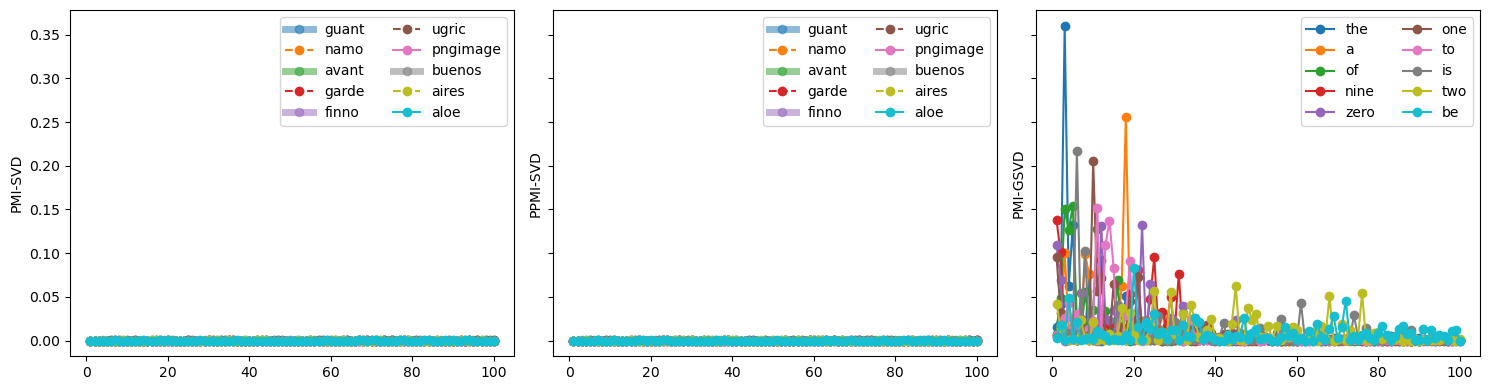

In [14]:
#This is to plot the contributions of rows, corresponding to the extreme values for PMI-SVD, PPMI-SVD, PMI-GSVD. This is used in Figure 1
colnames = ["PMI-SVD", "PPMI-SVD", "PMI-GSVD"]

fig, axs = plt.subplots(nrows=1, ncols=3,sharey = True, figsize=(15, 4))


i = 0
dimred = 100
while i < num_ext:
    if i == (num_ext-1):
        axs[0].plot(range(1, dimred+1), text8_pmi_svd_row_con_firstn_dim[text8_pmi_index[i][0][0], 0:dimred], "o-", label = words[text8_pmi_index[i][0][0]])
    elif text8_pmi_index[i][0][0] == text8_pmi_index[i][1][0]:
        axs[0].plot(range(1, dimred+1), text8_pmi_svd_row_con_firstn_dim[text8_pmi_index[i][0][0], 0:dimred], "o-", label = words[text8_pmi_index[i][0][0]])
    elif (text8_pmi_index[i][0][0] == text8_pmi_index[i+1][1][0]):
        axs[0].plot(range(1, dimred+1), text8_pmi_svd_row_con_firstn_dim[text8_pmi_index[i][0][0], 0:dimred], "o-", label = words[text8_pmi_index[i][0][0]], alpha=0.5, linewidth=5)
        axs[0].plot(range(1, dimred+1), text8_pmi_svd_row_con_firstn_dim[text8_pmi_index[i+1][0][0], 0:dimred], "o--", label = words[text8_pmi_index[i+1][0][0]])
    
    if i == (num_ext-1):
        axs[1].plot(range(1, dimred+1), text8_ppmi_svd_row_con_firstn_dim[text8_ppmi_index[i][0][0], 0:dimred], "o-", label = words[text8_ppmi_index[i][0][0]])
    elif text8_ppmi_index[i][0][0] == text8_ppmi_index[i][1][0]:
        axs[1].plot(range(1, dimred+1), text8_ppmi_svd_row_con_firstn_dim[text8_ppmi_index[i][0][0], 0:dimred], "o-", label = words[text8_ppmi_index[i][0][0]])
    elif (text8_ppmi_index[i][0][0] == text8_ppmi_index[i+1][1][0]):
        axs[1].plot(range(1, dimred+1), text8_ppmi_svd_row_con_firstn_dim[text8_ppmi_index[i][0][0], 0:dimred], "o-", label = words[text8_ppmi_index[i][0][0]], alpha=0.5, linewidth=5)
        axs[1].plot(range(1, dimred+1), text8_ppmi_svd_row_con_firstn_dim[text8_ppmi_index[i+1][0][0], 0:dimred], "o--", label = words[text8_ppmi_index[i+1][0][0]])

    axs[2].plot(range(1, dimred+1), text8_pmi_gsvd_row_con_firstn_dim[res_list_text8_pmi_gsvd_index[i], 0:dimred], "o-", label = words[res_list_text8_pmi_gsvd_index[i]])   
        
    i = i + 1


    #   plt.plot(range(1, dim+1), text8_pmi_svd_row_con_firstn_dim[text8_pmi_index[i][0][0] ,:], "o-", label = "RAW-CA: "+words[text8_pmi_index[i][0][0]]+" or "+words[text8_pmi_index[i][1][0]])
        #print(text8_pmi_svd_row_con_firstn_dim[text8_pmi_index[i][0][0] ,:])
        #print(text8_pmi_svd_row_con_firstn_dim[text8_pmi_index[i+1][1][0] ,:])
    
i = 0
for ax in axs:
    ax.set_ylabel(colnames[i])
    ax.legend(ncol=2)
    i = i + 1    
plt.tight_layout()
plt.savefig("D:\\carme\\text8pmiextremevaluecontri.png")

# Show the plot
plt.show()

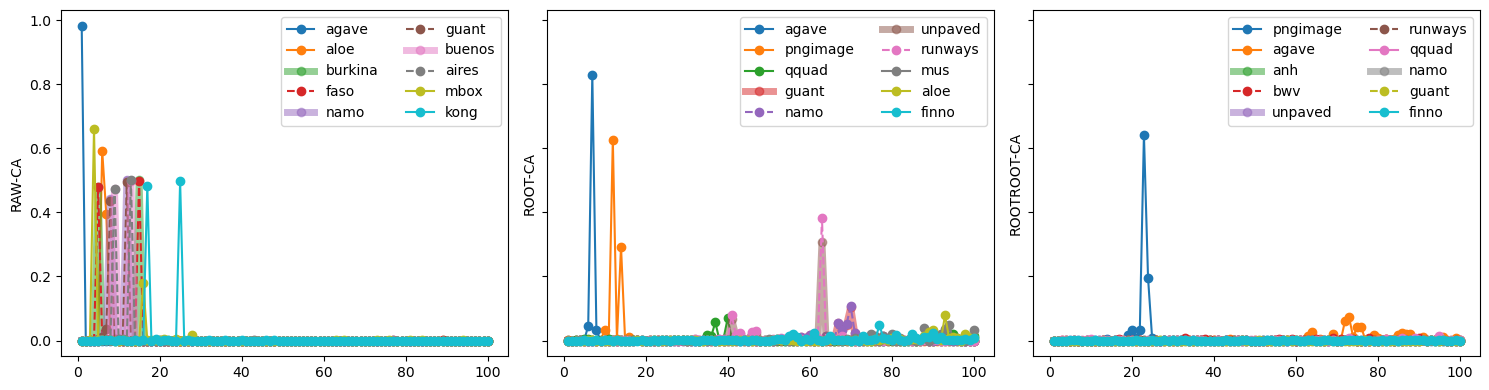

In [6]:
#This is to plot the contributions of rows, corresponding to the extreme values for RAW-CA, ROOT-CA, ROOTROOT-CA. This is used in Figure 2

colnames = ["RAW-CA", "ROOT-CA", "ROOTROOT-CA"]
fig, axs = plt.subplots(nrows=1, ncols=len(colnames),sharey = True, figsize=(15, 4))


i = 0
dimred = 100
while i < num_ext:
    if i == (num_ext-1):
        axs[0].plot(range(1, dimred+1), text8_ca_row_con_firstn_dim[text8_ttest_index[i][0][0], 0:dimred], "o-", label = words[text8_ttest_index[i][0][0]])
    elif text8_ttest_index[i][0][0] == text8_ttest_index[i][1][0]:
        axs[0].plot(range(1, dimred+1), text8_ca_row_con_firstn_dim[text8_ttest_index[i][0][0], 0:dimred], "o-", label = words[text8_ttest_index[i][0][0]])
    elif (text8_ttest_index[i][0][0] == text8_ttest_index[i+1][1][0]):
        axs[0].plot(range(1, dimred+1), text8_ca_row_con_firstn_dim[text8_ttest_index[i][0][0], 0:dimred], "o-", label = words[text8_ttest_index[i][0][0]], alpha=0.5, linewidth=5)
        axs[0].plot(range(1, dimred+1), text8_ca_row_con_firstn_dim[text8_ttest_index[i+1][0][0], 0:dimred], "o--", label = words[text8_ttest_index[i+1][0][0]])
    
    if i == (num_ext-1):
        axs[1].plot(range(1, dimred+1), text8_ca_root_row_con_firstn_dim[text8_root_ttest_index[i][0][0], 0:dimred], "o-", label = words[text8_root_ttest_index[i][0][0]])
    elif text8_root_ttest_index[i][0][0] == text8_root_ttest_index[i][1][0]:
        axs[1].plot(range(1, dimred+1), text8_ca_root_row_con_firstn_dim[text8_root_ttest_index[i][0][0], 0:dimred], "o-", label = words[text8_root_ttest_index[i][0][0]])
    elif (text8_root_ttest_index[i][0][0] == text8_root_ttest_index[i+1][1][0]):
        axs[1].plot(range(1, dimred+1), text8_ca_root_row_con_firstn_dim[text8_root_ttest_index[i][0][0], 0:dimred], "o-", label = words[text8_root_ttest_index[i][0][0]], alpha=0.5, linewidth=5)
        axs[1].plot(range(1, dimred+1), text8_ca_root_row_con_firstn_dim[text8_root_ttest_index[i+1][0][0], 0:dimred], "o--", label = words[text8_root_ttest_index[i+1][0][0]])

    if i == (num_ext-1):
        axs[2].plot(range(1, dimred+1), text8_ca_rootroot_row_con_firstn_dim[text8_rootroot_ttest_index[i][0][0], 0:dimred], "o-", label = words[text8_rootroot_ttest_index[i][0][0]])
    elif text8_rootroot_ttest_index[i][0][0] == text8_rootroot_ttest_index[i][1][0]:
        axs[2].plot(range(1, dimred+1), text8_ca_rootroot_row_con_firstn_dim[text8_rootroot_ttest_index[i][0][0], 0:dimred], "o-", label = words[text8_rootroot_ttest_index[i][0][0]])
    elif (text8_rootroot_ttest_index[i][0][0] == text8_rootroot_ttest_index[i+1][1][0]):
        axs[2].plot(range(1, dimred+1), text8_ca_rootroot_row_con_firstn_dim[text8_rootroot_ttest_index[i][0][0], 0:dimred], "o-", label = words[text8_rootroot_ttest_index[i][0][0]], alpha=0.5, linewidth=5)
        axs[2].plot(range(1, dimred+1), text8_ca_rootroot_row_con_firstn_dim[text8_rootroot_ttest_index[i+1][0][0], 0:dimred], "o--", label = words[text8_rootroot_ttest_index[i+1][0][0]])
     #   plt.plot(range(1, dim+1), text8_ca_row_con_firstn_dim[text8_ttest_index[i][0][0] ,:], "o-", label = "RAW-CA: "+words[text8_ttest_index[i][0][0]]+" or "+words[text8_ttest_index[i][1][0]])
        #print(text8_ca_row_con_firstn_dim[text8_ttest_index[i][0][0] ,:])
        #print(text8_ca_row_con_firstn_dim[text8_ttest_index[i+1][1][0] ,:])


    i = i + 1
    
i = 0
for ax in axs:
    ax.set_ylabel(colnames[i])
    ax.legend(ncol=2)
    i = i + 1    

plt.tight_layout()
plt.savefig("D:\\carme\\text8caextremevaluecontri.png")

# Show the plot
plt.show()

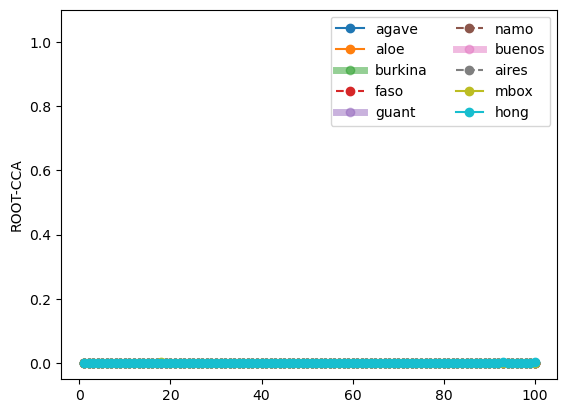

In [9]:
#This is to plot the contributions of rows, corresponding to the extreme values for ROOT-CCA. This is used in Figure D.1

i = 0
dimred = 100
while i < num_ext:
    if i == (num_ext-1):
        plt.plot(range(1, dimred+1), text8_ca_rootcca_row_con_firstn_dim[text8_rootcca_index_copy[i][0][0], 0:dimred], "o-", label = words[text8_rootcca_index_copy[i][0][0]])
    elif text8_rootcca_index_copy[i][0][0] == text8_rootcca_index_copy[i][1][0]:
        plt.plot(range(1, dimred+1), text8_ca_rootcca_row_con_firstn_dim[text8_rootcca_index_copy[i][0][0], 0:dimred], "o-", label = words[text8_rootcca_index_copy[i][0][0]])
    elif (text8_rootcca_index_copy[i][0][0] == text8_rootcca_index_copy[i+1][1][0]):
        plt.plot(range(1, dimred+1), text8_ca_rootcca_row_con_firstn_dim[text8_rootcca_index_copy[i][0][0], 0:dimred], "o-", label = words[text8_rootcca_index_copy[i][0][0]], alpha=0.5, linewidth=5)
        plt.plot(range(1, dimred+1), text8_ca_rootcca_row_con_firstn_dim[text8_rootcca_index_copy[i+1][0][0], 0:dimred], "o--", label = words[text8_rootcca_index_copy[i+1][0][0]])
    i = i+1
    

plt.ylabel("ROOT-CCA")
plt.legend(ncol=2)
plt.ylim(-0.05, 1.1)
plt.savefig("D:\\carme\\text8rootccaextremevaluecontri.png")

# Show the plot
plt.show()

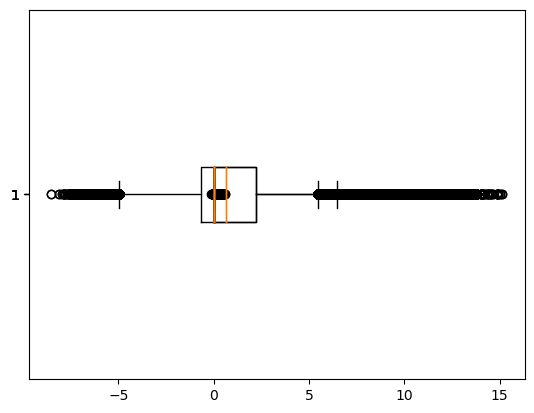

In [26]:
#Use the boxplot to calculate the number of extreme values for BNC

whis_value = 1.5

# Plot histograms on separate subplots using plt.hist()
bnc_pmi_fla_box = plt.boxplot(bnc_pmi_fla[bnc_pmi_fla != 0], whis = whis_value, vert = False)

bnc_ppmi_fla_box = plt.boxplot(bnc_ppmi_fla[bnc_pmi_fla != 0], whis = whis_value, vert = False)

bnc_pmi_gsvd_fla_box = plt.boxplot(bnc_pmi_gsvd_fla[bnc_pmi_fla != 0], whis = whis_value, vert = False)


# Plot histograms on separate subplots using plt.hist()
bnc_ttest_fla_box = plt.boxplot(bnc_ttest_fla[bnc_pmi_fla != 0], whis = whis_value, vert = False)

bnc_root_ttest_fla_box = plt.boxplot(bnc_root_ttest_fla[bnc_pmi_fla != 0], whis = whis_value, vert = False)

bnc_rootroot_ttest_fla_box = plt.boxplot(bnc_rootroot_ttest_fla[bnc_pmi_fla != 0], whis = whis_value, vert = False)

bnc_rootcca_fla_box = plt.boxplot(bnc_rootcca_fla[bnc_pmi_fla != 0], whis = whis_value, vert = False)


In [28]:
bnc_pmi_fla_box['medians'][0].get_xdata()

array([0.64422319, 0.64422319])

In [33]:
bnc_pmi_fla_box['fliers'][0].get_xdata()

array([-5.21944433, -5.00312643, -5.19844314, ...,  7.47130308,
        6.71022756, 11.9921153 ])

In [36]:
bnc_pmi_fla_box['whiskers'][0].get_xdata()[1]

-4.9563337917185954

In [38]:
q1 = np.percentile(bnc_pmi_fla[bnc_pmi_fla != 0], 25)

In [39]:
q3 = np.percentile(bnc_pmi_fla[bnc_pmi_fla != 0], 75)

In [40]:
q1 - 1.5 * (q3-q1)

-4.9563659634416615

In [42]:
np.sum(bnc_pmi_fla[bnc_pmi_fla != 0] < (q1 - 1.5 * (q3-q1)))

13982

In [43]:
np.sum(bnc_pmi_fla[bnc_pmi_fla != 0] > (q3 + 1.5 * (q3-q1)))

127384

In [44]:
#This is used for Table C.1


data1 = dict(PMI = [sum(bnc_pmi_fla_box['fliers'][0].get_xdata() < bnc_pmi_fla_box['whiskers'][0].get_xdata()[1]), sum(bnc_pmi_fla_box['fliers'][0].get_xdata() > bnc_pmi_fla_box['whiskers'][1].get_xdata()[1]), len(bnc_pmi_fla_box['fliers'][0].get_xdata())],
       PPMI = [sum(bnc_ppmi_fla_box['fliers'][0].get_xdata() < bnc_ppmi_fla_box['whiskers'][0].get_xdata()[1]), sum(bnc_ppmi_fla_box['fliers'][0].get_xdata() > bnc_ppmi_fla_box['whiskers'][1].get_xdata()[1]), len(bnc_ppmi_fla_box['fliers'][0].get_xdata())],
       WPMI = [sum(bnc_pmi_gsvd_fla_box['fliers'][0].get_xdata() < bnc_pmi_gsvd_fla_box['whiskers'][0].get_xdata()[1]), sum(bnc_pmi_gsvd_fla_box['fliers'][0].get_xdata() > bnc_pmi_gsvd_fla_box['whiskers'][1].get_xdata()[1]), len(bnc_pmi_gsvd_fla_box['fliers'][0].get_xdata())],
       RAWTTEST = [sum(bnc_ttest_fla_box['fliers'][0].get_xdata() < bnc_ttest_fla_box['whiskers'][0].get_xdata()[1]), sum(bnc_ttest_fla_box['fliers'][0].get_xdata() > bnc_ttest_fla_box['whiskers'][1].get_xdata()[1]), len(bnc_ttest_fla_box['fliers'][0].get_xdata())],
       ROOTTTEST = [sum(bnc_root_ttest_fla_box['fliers'][0].get_xdata() < bnc_root_ttest_fla_box['whiskers'][0].get_xdata()[1]), sum(bnc_root_ttest_fla_box['fliers'][0].get_xdata() > bnc_root_ttest_fla_box['whiskers'][1].get_xdata()[1]), len(bnc_root_ttest_fla_box['fliers'][0].get_xdata())],
       ROOTROOTTTEST = [sum(bnc_rootroot_ttest_fla_box['fliers'][0].get_xdata() < bnc_rootroot_ttest_fla_box['whiskers'][0].get_xdata()[1]), sum(bnc_rootroot_ttest_fla_box['fliers'][0].get_xdata() > bnc_rootroot_ttest_fla_box['whiskers'][1].get_xdata()[1]), len(bnc_rootroot_ttest_fla_box['fliers'][0].get_xdata())],
       STRATOSTTEST = [sum(bnc_rootcca_fla_box['fliers'][0].get_xdata() < bnc_rootcca_fla_box['whiskers'][0].get_xdata()[1]), sum(bnc_rootcca_fla_box['fliers'][0].get_xdata() > bnc_rootcca_fla_box['whiskers'][1].get_xdata()[1]), len(bnc_rootcca_fla_box['fliers'][0].get_xdata())]
           )
df1 = pd.DataFrame(data1)
print(df1.T.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &        0 &        1 &        2 \\
\midrule
PMI           &    13982 &   127384 &   141366 \\
PPMI          &        0 &   405830 &   405830 \\
WPMI          &  2037800 &   487545 &  2525345 \\
RAWTTEST      &   334512 &  1480336 &  1814848 \\
ROOTTTEST     &    35418 &   927470 &   962888 \\
ROOTROOTTTEST &    31234 &   750433 &   781667 \\
STRATOSTTEST  &        0 &  1173717 &  1173717 \\
\bottomrule
\end{tabular}



C:\Users\qi000005\AppData\Local\Temp\ipykernel_6984\3071218057.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df1.T.to_latex())


In [48]:
bnc_pmi_gsvd_index = [np.where(np.abs(bnc_pmi_gsvd) == x) for x in sorted(np.abs(bnc_pmi_gsvd_fla[bnc_pmi_fla != 0]), reverse=True)[:k*num_ext]]


In [49]:
bnc_pmi_gsvd_index

[(array([17], dtype=int64), array([17], dtype=int64)),
 (array([17], dtype=int64), array([7], dtype=int64)),
 (array([7], dtype=int64), array([17], dtype=int64)),
 (array([64], dtype=int64), array([64], dtype=int64)),
 (array([43], dtype=int64), array([64], dtype=int64)),
 (array([64], dtype=int64), array([43], dtype=int64)),
 (array([64], dtype=int64), array([17], dtype=int64)),
 (array([17], dtype=int64), array([64], dtype=int64)),
 (array([17], dtype=int64), array([206], dtype=int64)),
 (array([206], dtype=int64), array([17], dtype=int64)),
 (array([222], dtype=int64), array([1], dtype=int64)),
 (array([1], dtype=int64), array([222], dtype=int64)),
 (array([17], dtype=int64), array([52], dtype=int64)),
 (array([52], dtype=int64), array([17], dtype=int64)),
 (array([64], dtype=int64), array([206], dtype=int64)),
 (array([206], dtype=int64), array([64], dtype=int64)),
 (array([7], dtype=int64), array([7], dtype=int64)),
 (array([43], dtype=int64), array([43], dtype=int64)),
 (array([1

In [9]:
#Finding the top 10 extrme values, corresponding to the rows for WPMI of BNC; In PMI-GSVD, there are overlap rows in top 10 extreme entries. For example, the entry (the, the) and (the,
#a) have the row ”the”. Then we choose another different row until 10 rows chosen.
k = 5
bnc_pmi_gsvd_index = [np.where(np.abs(bnc_pmi_gsvd) == x) for x in sorted(np.abs(bnc_pmi_gsvd_fla[bnc_pmi_fla != 0]), reverse=True)[:k*num_ext]]
bnc_pmi_gsvd_index_list = []
for i in range(k*num_ext):
    bnc_pmi_gsvd_index_list.append(bnc_pmi_gsvd_index[i][0][0])

res_list_bnc_pmi_gsvd_index = []
for item in bnc_pmi_gsvd_index_list: 
    if item not in res_list_bnc_pmi_gsvd_index: 
        res_list_bnc_pmi_gsvd_index.append(item)

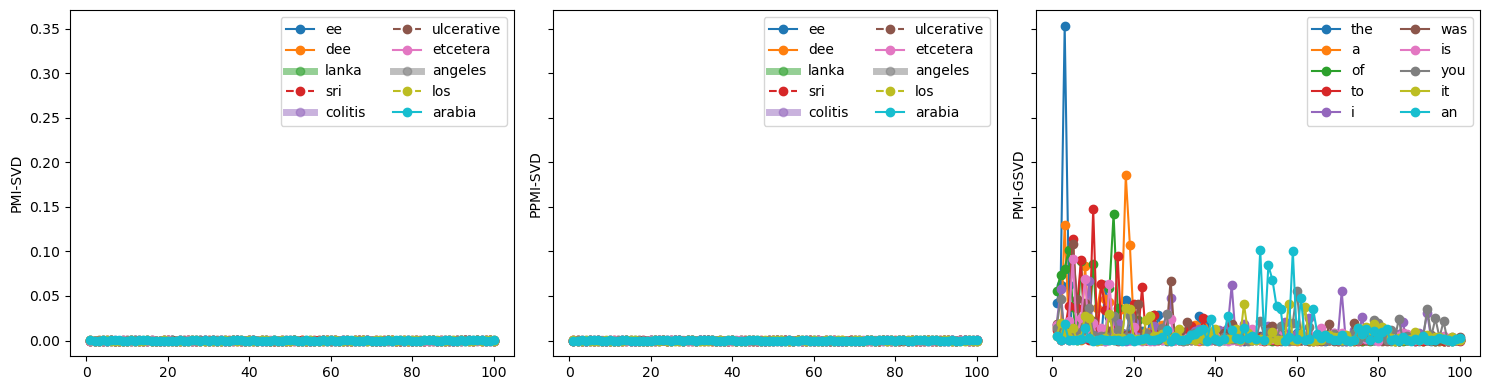

In [28]:
#This is to plot the contributions of rows, corresponding to the extreme values for PMI-SVD, PPMI-SVD, PMI-GSVD. This is used in Figure C.1


colnames = ["PMI-SVD", "PPMI-SVD", "PMI-GSVD"]

fig, axs = plt.subplots(nrows=1, ncols=3,sharey = True, figsize=(15, 4))


i = 0
dimred = 100
while i < num_ext:
    if i == (num_ext-1):
        axs[0].plot(range(1, dimred+1), bnc_pmi_svd_row_con_firstn_dim[bnc_pmi_index[i][0][0], 0:dimred], "o-", label = words[bnc_pmi_index[i][0][0]])
    elif bnc_pmi_index[i][0][0] == bnc_pmi_index[i][1][0]:
        axs[0].plot(range(1, dimred+1), bnc_pmi_svd_row_con_firstn_dim[bnc_pmi_index[i][0][0], 0:dimred], "o-", label = words[bnc_pmi_index[i][0][0]])
    elif (bnc_pmi_index[i][0][0] == bnc_pmi_index[i+1][1][0]):
        axs[0].plot(range(1, dimred+1), bnc_pmi_svd_row_con_firstn_dim[bnc_pmi_index[i][0][0], 0:dimred], "o-", label = words[bnc_pmi_index[i][0][0]], alpha=0.5, linewidth=5)
        axs[0].plot(range(1, dimred+1), bnc_pmi_svd_row_con_firstn_dim[bnc_pmi_index[i+1][0][0], 0:dimred], "o--", label = words[bnc_pmi_index[i+1][0][0]])
    
    if i == (num_ext-1):
        axs[1].plot(range(1, dimred+1), bnc_ppmi_svd_row_con_firstn_dim[bnc_ppmi_index[i][0][0], 0:dimred], "o-", label = words[bnc_ppmi_index[i][0][0]])
    elif bnc_ppmi_index[i][0][0] == bnc_ppmi_index[i][1][0]:
        axs[1].plot(range(1, dimred+1), bnc_ppmi_svd_row_con_firstn_dim[bnc_ppmi_index[i][0][0], 0:dimred], "o-", label = words[bnc_ppmi_index[i][0][0]])
    elif (bnc_ppmi_index[i][0][0] == bnc_ppmi_index[i+1][1][0]):
        axs[1].plot(range(1, dimred+1), bnc_ppmi_svd_row_con_firstn_dim[bnc_ppmi_index[i][0][0], 0:dimred], "o-", label = words[bnc_ppmi_index[i][0][0]], alpha=0.5, linewidth=5)
        axs[1].plot(range(1, dimred+1), bnc_ppmi_svd_row_con_firstn_dim[bnc_ppmi_index[i+1][0][0], 0:dimred], "o--", label = words[bnc_ppmi_index[i+1][0][0]])

    axs[2].plot(range(1, dimred+1), bnc_pmi_gsvd_row_con_firstn_dim[res_list_bnc_pmi_gsvd_index[i], 0:dimred], "o-", label = words[res_list_bnc_pmi_gsvd_index[i]])   
        
    i = i + 1


    #   plt.plot(range(1, dim+1), bnc_pmi_svd_row_con_firstn_dim[bnc_pmi_index[i][0][0] ,:], "o-", label = "RAW-CA: "+words[bnc_pmi_index[i][0][0]]+" or "+words[bnc_pmi_index[i][1][0]])
        #print(bnc_pmi_svd_row_con_firstn_dim[bnc_pmi_index[i][0][0] ,:])
        #print(bnc_pmi_svd_row_con_firstn_dim[bnc_pmi_index[i+1][1][0] ,:])
    
i = 0
for ax in axs:
    ax.set_ylabel(colnames[i])
    ax.legend(ncol=2)
    i = i + 1    
plt.tight_layout()
plt.savefig("D:\\carme\\bncpmiextremevaluecontri.png")

# Show the plot
plt.show()

In [24]:
#Finding the top 10 extrme values, corresponding to the rows for WPMI of BNC; In PMI-GSVD, there are overlap rows in top 10 extreme entries. For example, index 11300. Then we choose another different row until 10 rows chosen.
bnc_rootroot_ttest_index = [np.where(bnc_rootroot_ttest == x) for x in sorted(bnc_rootroot_ttest_fla[bnc_pmi_fla != 0], reverse=True)[:(num_ext+1)]]


In [25]:
bnc_rootroot_ttest_index

[(array([11217], dtype=int64), array([11292], dtype=int64)),
 (array([11292], dtype=int64), array([11217], dtype=int64)),
 (array([11321], dtype=int64), array([11300], dtype=int64)),
 (array([11300], dtype=int64), array([11321], dtype=int64)),
 (array([11236], dtype=int64), array([11300], dtype=int64)),
 (array([11300], dtype=int64), array([11236], dtype=int64)),
 (array([11262], dtype=int64), array([11262], dtype=int64)),
 (array([8381], dtype=int64), array([11204], dtype=int64)),
 (array([11204], dtype=int64), array([8381], dtype=int64)),
 (array([11070], dtype=int64), array([11070], dtype=int64)),
 (array([10806], dtype=int64), array([10806], dtype=int64))]

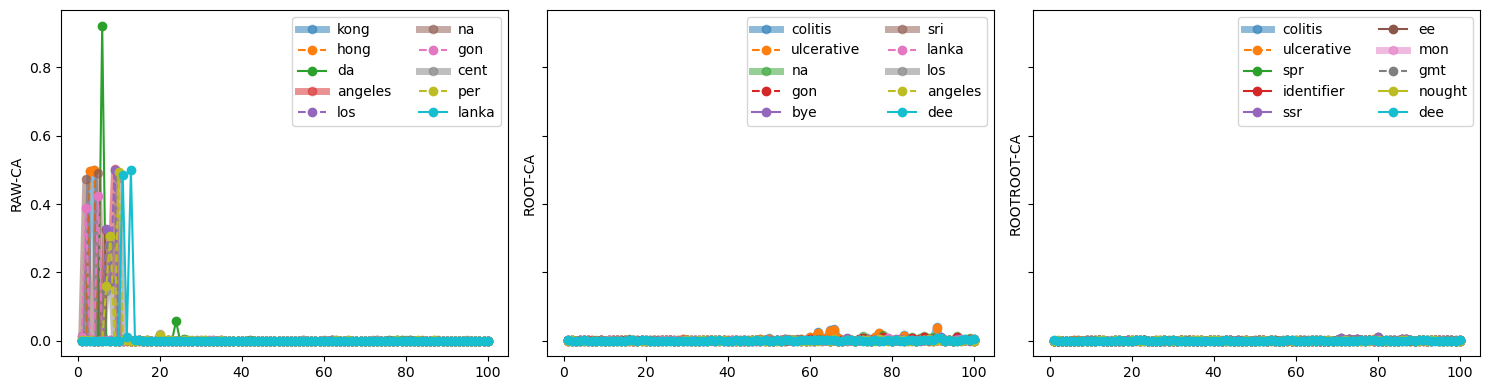

In [26]:
#This is to plot the contributions of rows, corresponding to the extreme values for RAW-CA, ROOT-CA, ROOTROOT-CA. This is used in Figure E.1

colnames = ["RAW-CA", "ROOT-CA", "ROOTROOT-CA"]
fig, axs = plt.subplots(nrows=1, ncols=len(colnames),sharey = True, figsize=(15, 4))


i = 0
dimred = 100
while i < num_ext:
    if i == (num_ext-1):
        axs[0].plot(range(1, dimred+1), bnc_ca_row_con_firstn_dim[bnc_ttest_index[i][0][0], 0:dimred], "o-", label = words[bnc_ttest_index[i][0][0]])
    elif bnc_ttest_index[i][0][0] == bnc_ttest_index[i][1][0]:
        axs[0].plot(range(1, dimred+1), bnc_ca_row_con_firstn_dim[bnc_ttest_index[i][0][0], 0:dimred], "o-", label = words[bnc_ttest_index[i][0][0]])
    elif (bnc_ttest_index[i][0][0] == bnc_ttest_index[i+1][1][0]):
        axs[0].plot(range(1, dimred+1), bnc_ca_row_con_firstn_dim[bnc_ttest_index[i][0][0], 0:dimred], "o-", label = words[bnc_ttest_index[i][0][0]], alpha=0.5, linewidth=5)
        axs[0].plot(range(1, dimred+1), bnc_ca_row_con_firstn_dim[bnc_ttest_index[i+1][0][0], 0:dimred], "o--", label = words[bnc_ttest_index[i+1][0][0]])
    
    if i == (num_ext-1):
        axs[1].plot(range(1, dimred+1), bnc_ca_root_row_con_firstn_dim[bnc_root_ttest_index[i][0][0], 0:dimred], "o-", label = words[bnc_root_ttest_index[i][0][0]])
    elif bnc_root_ttest_index[i][0][0] == bnc_root_ttest_index[i][1][0]:
        axs[1].plot(range(1, dimred+1), bnc_ca_root_row_con_firstn_dim[bnc_root_ttest_index[i][0][0], 0:dimred], "o-", label = words[bnc_root_ttest_index[i][0][0]])
    elif (bnc_root_ttest_index[i][0][0] == bnc_root_ttest_index[i+1][1][0]):
        axs[1].plot(range(1, dimred+1), bnc_ca_root_row_con_firstn_dim[bnc_root_ttest_index[i][0][0], 0:dimred], "o-", label = words[bnc_root_ttest_index[i][0][0]], alpha=0.5, linewidth=5)
        axs[1].plot(range(1, dimred+1), bnc_ca_root_row_con_firstn_dim[bnc_root_ttest_index[i+1][0][0], 0:dimred], "o--", label = words[bnc_root_ttest_index[i+1][0][0]])

    

     #   plt.plot(range(1, dim+1), bnc_ca_row_con_firstn_dim[bnc_ttest_index[i][0][0] ,:], "o-", label = "RAW-CA: "+words[bnc_ttest_index[i][0][0]]+" or "+words[bnc_ttest_index[i][1][0]])
        #print(bnc_ca_row_con_firstn_dim[bnc_ttest_index[i][0][0] ,:])
        #print(bnc_ca_row_con_firstn_dim[bnc_ttest_index[i+1][1][0] ,:])


    i = i + 1

axs[2].plot(range(1, dimred+1), bnc_ca_rootroot_row_con_firstn_dim[bnc_rootroot_ttest_index[0][0][0], 0:dimred], "o-", label = words[bnc_rootroot_ttest_index[0][0][0]], alpha=0.5, linewidth=5)
axs[2].plot(range(1, dimred+1), bnc_ca_rootroot_row_con_firstn_dim[bnc_rootroot_ttest_index[1][0][0], 0:dimred], "o--", label = words[bnc_rootroot_ttest_index[1][0][0]])
   
axs[2].plot(range(1, dimred+1), bnc_ca_rootroot_row_con_firstn_dim[bnc_rootroot_ttest_index[2][0][0], 0:dimred], "o-", label = words[bnc_rootroot_ttest_index[2][0][0]])
axs[2].plot(range(1, dimred+1), bnc_ca_rootroot_row_con_firstn_dim[bnc_rootroot_ttest_index[3][0][0], 0:dimred], "o-", label = words[bnc_rootroot_ttest_index[3][0][0]])

axs[2].plot(range(1, dimred+1), bnc_ca_rootroot_row_con_firstn_dim[bnc_rootroot_ttest_index[4][0][0], 0:dimred], "o-", label = words[bnc_rootroot_ttest_index[4][0][0]])
axs[2].plot(range(1, dimred+1), bnc_ca_rootroot_row_con_firstn_dim[bnc_rootroot_ttest_index[6][0][0], 0:dimred], "o-", label = words[bnc_rootroot_ttest_index[6][0][0]])
 
axs[2].plot(range(1, dimred+1), bnc_ca_rootroot_row_con_firstn_dim[bnc_rootroot_ttest_index[7][0][0], 0:dimred], "o-", label = words[bnc_rootroot_ttest_index[7][0][0]], alpha=0.5, linewidth=5)
axs[2].plot(range(1, dimred+1), bnc_ca_rootroot_row_con_firstn_dim[bnc_rootroot_ttest_index[8][0][0], 0:dimred], "o--", label = words[bnc_rootroot_ttest_index[8][0][0]])
   
axs[2].plot(range(1, dimred+1), bnc_ca_rootroot_row_con_firstn_dim[bnc_rootroot_ttest_index[9][0][0], 0:dimred], "o-", label = words[bnc_rootroot_ttest_index[9][0][0]])
axs[2].plot(range(1, dimred+1), bnc_ca_rootroot_row_con_firstn_dim[bnc_rootroot_ttest_index[10][0][0], 0:dimred], "o-", label = words[bnc_rootroot_ttest_index[10][0][0]])

i = 0
for ax in axs:
    ax.set_ylabel(colnames[i])
    ax.legend(ncol=2)
    i = i + 1    

plt.tight_layout()
plt.savefig("D:\\carme\\bnccaextremevaluecontri.png")

# Show the plot
plt.show()

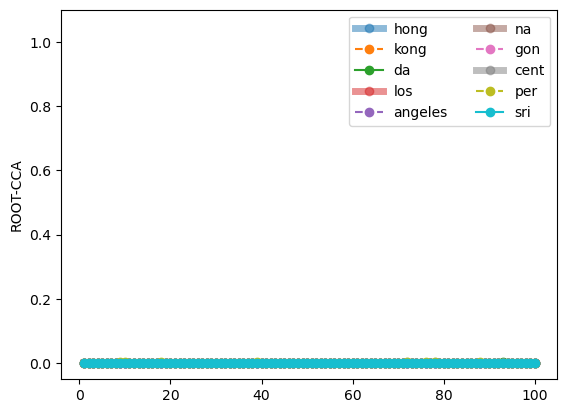

In [27]:
#This is to plot the contributions of rows, corresponding to the extreme values for ROOT-CCA. This is used in Figure E.2

i = 0
dimred = 100
while i < num_ext:
    if i == (num_ext-1):
        plt.plot(range(1, dimred+1), bnc_ca_rootcca_row_con_firstn_dim[bnc_rootcca_index_copy[i][0][0], 0:dimred], "o-", label = words[bnc_rootcca_index_copy[i][0][0]])
    elif bnc_rootcca_index_copy[i][0][0] == bnc_rootcca_index_copy[i][1][0]:
        plt.plot(range(1, dimred+1), bnc_ca_rootcca_row_con_firstn_dim[bnc_rootcca_index_copy[i][0][0], 0:dimred], "o-", label = words[bnc_rootcca_index_copy[i][0][0]])
    elif (bnc_rootcca_index_copy[i][0][0] == bnc_rootcca_index_copy[i+1][1][0]):
        plt.plot(range(1, dimred+1), bnc_ca_rootcca_row_con_firstn_dim[bnc_rootcca_index_copy[i][0][0], 0:dimred], "o-", label = words[bnc_rootcca_index_copy[i][0][0]], alpha=0.5, linewidth=5)
        plt.plot(range(1, dimred+1), bnc_ca_rootcca_row_con_firstn_dim[bnc_rootcca_index_copy[i+1][0][0], 0:dimred], "o--", label = words[bnc_rootcca_index_copy[i+1][0][0]])
    i = i+1
    

plt.ylabel("ROOT-CCA")
plt.legend(ncol=2)
plt.ylim(-0.05, 1.1)
plt.savefig("D:\\carme\\bncrootccaextremevaluecontri.png")

# Show the plot
plt.show()